<a href="https://colab.research.google.com/github/anggrainyshinta/churncustomer/blob/main/GFP_Analysis_Team_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import chisquare
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# **Load Dataset**

In [ ]:
#load dataset (csv file) from gdrive
url = 'https://drive.google.com/file/d/1UC-iUChUtKgGjq_Tc-CS1WUQLdRWg3OT/view?usp=share_link'
csv_url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
df_bank = pd.read_csv(csv_url)
df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# **Data Cleaning**

## Removing Irrelevant Values



In [ ]:
# we can remove the RowNumber column
df = df_bank.drop(columns='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##  Check Missing Values

from df.info() we can see that there are no null values.

Just to make sure, check again



In [ ]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

no missing values

## Check Duplicate Values

In [ ]:
df.duplicated().sum()

0

no duplicate value

## Check Unique Values

In [ ]:
for i in df.columns:
  unique_data = df[i].value_counts()
  print (unique_data,'\n')

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64 

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64 

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64 

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 

Male      5457
Female    4543
Name: Gender, dtype: int64 

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64 

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure,

## Convert Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
# convert CustomerId data type from int to string
df['CustomerId'] = df['CustomerId'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  object 
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


## Outliers Checking

In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

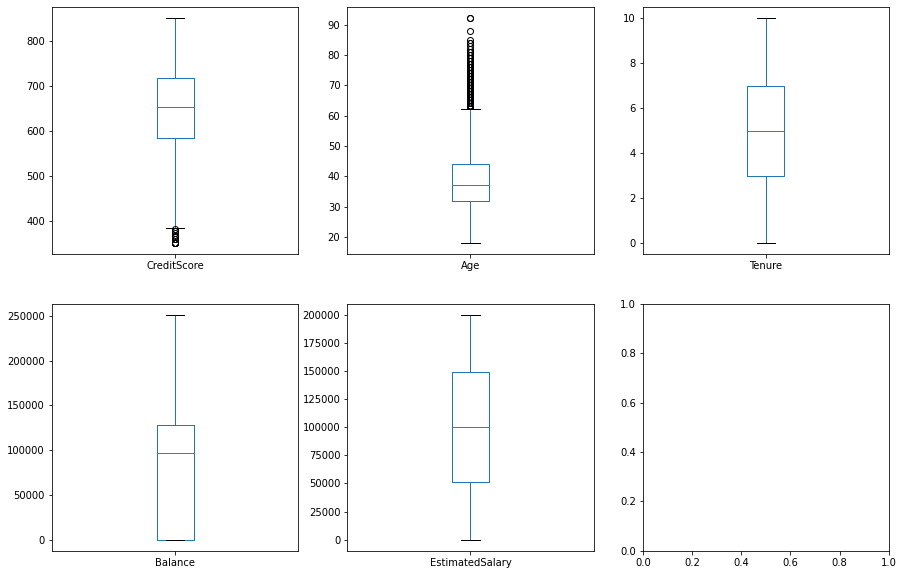

In [ ]:
# define columns that need to be checked for outliers
outliers_column = ['CreditScore', 'Age','Tenure', 'Balance','EstimatedSalary']

# create box plot for those columns
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
for i,j in enumerate(outliers_column):
  df.boxplot(j, ax=axes.flatten()[i],grid=False)

credit score and age have outliers

### Credit Score

In [ ]:
# Hitung kuartil 1 dan 3
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)

#Hitung interkuartil range
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',lower_limit)
print('\nMax:\n',upper_limit)

Q1:
 584.0

Q3:
 718.0

IQR:
 134.0

Min:
 383.0

Max:
 919.0


In [ ]:
#find the outliers and count how many data has outlier in credit score
df.loc[(df['CreditScore'] > upper_limit) |  (df['CreditScore'] < lower_limit)].shape[0]


15

### Age

In [ ]:
# Hitung kuartil 1 dan 3
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

#Hitung interkuartil range
IQR = Q3 - Q1
age_lower_limit = Q1 - 1.5 * IQR
age_upper_limit = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',age_lower_limit)
print('\nMax:\n',age_upper_limit)

Q1:
 32.0

Q3:
 44.0

IQR:
 12.0

Min:
 14.0

Max:
 62.0


In [ ]:
#find the outliers and count how many data has outlier in credit score
df.loc[(df['Age'] > age_upper_limit) | (df['Age'] < age_lower_limit)].shape[0]

359

Credit score less than 383 is considered an outlier.
- there are 15 customers in this data which considered as outliers in credit score

Age above 62 y.o. is considered an outlier
- there are 359 customers in this which considered as outliers in age

### data all outlier dropped

In [ ]:
filter_csmin = df['CreditScore']<lower_limit
filter_csmax = df['CreditScore']>upper_limit

filter_agmin = df['Age']<age_lower_limit
filter_agmax = df['Age']>age_upper_limit

df_non_outlier = df[~(filter_agmin|filter_agmax|filter_csmin|filter_csmax)]
df_non_outlier

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df_non_outlier.shape

(9626, 13)

# **Export clean data to drive**

## with outlier

In [ ]:
# Mount your Drive to the Collab
#from google.colab import drive
#drive.mount('drive')

In [ ]:
# export data to drive
#df.to_csv('drive/My Drive/Clean data with outlier.csv', index = False)

##without outlier

In [ ]:
# export data to drive
#df_non_outlier.to_csv('drive/My Drive/Clean data without outlier.csv', index = False)

#**EDA**

## Descriptive Statistic

In [ ]:
df_desc = df.copy()

df_desc = df_desc[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].describe()
df_desc

# Add kurtosis, skewness and variance row for data descriptice statistic
df_desc.loc['kurtosis'] = df_desc[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].kurt() #show kurtosis statistic
df_desc.loc['skewness'] = df_desc[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].skew() #show Skewness statistic
df_desc.loc['variance'] = df_desc[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].var() #show variance statistic

# round(2) all columns
df_desc.applymap('{:,.2f}'.format)

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,650.53,38.92,5.01,"76,485.89","100,090.24"
std,96.65,10.49,2.89,"62,397.41","57,510.49"
min,350.00,18.00,0.00,0.00,11.58
25%,584.00,32.00,3.00,0.00,"51,002.11"
50%,652.00,37.00,5.00,"97,198.54","100,193.91"
75%,718.00,44.00,7.00,"127,644.24","149,388.25"
max,850.00,92.00,10.00,"250,898.09","199,992.48"
kurtosis,7.88,8.00,8.00,1.84,-0.43
skewness,2.95,3.00,3.00,1.40,0.64


insight:
1. there are 10,000 customers
2. avg age is 39 y.o. avg credit score is 650.53 with 5 years avg tenure.
 avg account balance per user is 76,485.89 euro with 100,090.24 euro avg salary
3. credit score range 350-850
4. Age range 18-92 years old
5. Tenure range 0-10 years
6. Balance range 0-250,898.09 euro
7. Estimated salary range 11.58-199,992.48


## Group the Age

classify age range into different groups
[source](https://www.formpl.us/blog/age-survey-questions#:~:text=patient%20registration%20form.-,2.%20Age%20Group%20Method,-This%20is%20the)
- 18-24
- 25-34
- 35-44
- 45-54
- 55-64
- 65+


In [ ]:
# define age group
def age_group (x):
  if x < 25:
    return '18-24'
  elif x < 35:
    return '25-34'
  elif x < 45:
    return '35-44'
  elif x < 55:
    return '45-54'
  elif x < 65:
    return '55-64'
  else:
    return '65+'

# create new column for age group
df['Age_Group'] = df.Age.apply(age_group)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,35-44
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,35-44
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,35-44
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,35-44
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,35-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,35-44
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,35-44
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,35-44
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,35-44


## Group the Credit Score

classify the credit score into different groups [source](https://www.cnbc.com/select/what-is-a-good-credit-score/#:~:text=800%20to%20850-,VantageScore,-Very%20poor%3A%20300)
- Very poor: 300-499
- Poor: 500-600
- Fair: 601-660
- Good: 661-780
- Excellent: 781-850


In [ ]:
# define the group
def cr_group (x):
  if x < 500:
    return 'Very Poor'
  elif x < 601:
    return 'Poor'
  elif x < 661:
    return 'Fair'
  elif x < 781:
    return 'Good'
  else:
    return 'Excellent'

# create new column for credit score group
df['CreditScore_Group'] = df.CreditScore.apply(cr_group)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Group
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,35-44,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,35-44,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,35-44,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,35-44,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,35-44,Excellent


## Customer distribution

### Customer distribution based on age groups

In [ ]:
#number of customer based on age
df_age = df.groupby(['Age_Group']).nunique()['CustomerId'].reset_index()

#create the percentage column
df_age['%customer_age'] = (df_age['CustomerId']/(df_age['CustomerId'].sum()))*100
df_age

,Age_Group,CustomerId,%customer_age
0,18-24,457,4.57
1,25-34,3222,32.22
2,35-44,3981,39.81
3,45-54,1458,14.58
4,55-64,600,6.00
5,65+,282,2.82


most of the customers age are in the range 35-44 (39.8%) and 25-34 yars old (32.2%)

In [ ]:
df['Age'].mode()

0    37
dtype: int64

In [ ]:
df['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [ ]:
#age mode in each age groups
df.groupby(['Age_Group'])['Age'].agg([pd.Series.mode])

,mode
Age_Group,
18-24,24
25-34,34
35-44,37
45-54,45
55-64,55
65+,67


### Customer distribution based on credit score groups

In [ ]:
#number of customer based on cr score
df_crs = df.groupby(['CreditScore_Group']).nunique()['CustomerId'].reset_index()

#create the percentage column
df_crs['%'] = (df_crs['CustomerId']/(df_crs['CustomerId'].sum()))*100
df_crs

,CreditScore_Group,CustomerId,%
0,Excellent,950,9.50
1,Fair,2281,22.81
2,Good,3703,37.03
3,Poor,2434,24.34
4,Very Poor,632,6.32


37.03% of customers have a good credit score

###Customer distribution based on gender

In [ ]:
#number of customer based on gender
df_gen = df.groupby(['Gender']).nunique()['CustomerId'].reset_index()

#create the percentage column
df_gen['%customer_gender'] = (df_gen['CustomerId']/(df_gen['CustomerId'].sum()))*100
df_gen

,Gender,CustomerId,%customer_gender
0,Female,4543,45.43
1,Male,5457,54.57


### Customer distribution based on Country

In [ ]:
#number of customer based on geography
df_geo = df.groupby(['Geography']).nunique()['CustomerId'].reset_index()

#create the percentage column
df_geo['%customer_geo'] = (df_geo['CustomerId']/(df_geo['CustomerId'].sum()))*100
df_geo

,Geography,CustomerId,%customer_geo
0,France,5014,50.14
1,Germany,2509,25.09
2,Spain,2477,24.77


50.14% of the bank customers are from france

### Customer distribution based on product type

In [ ]:
#number of customer based on product
df_p = df.groupby(['NumOfProducts']).nunique()['CustomerId'].reset_index()

#create the percentage column
df_p['%product'] = (df_p['CustomerId']/(df_p['CustomerId'].sum()))*100
df_p

,NumOfProducts,CustomerId,%product
0,1,5084,50.84
1,2,4590,45.90
2,3,266,2.66
3,4,60,0.60


- product 1 is the most popular product type among customers (50.84%), followed by product 2 (45.9%).

- product 3 and 4 only used by a very few customer (2.66% and 0.6% respectively)

### Customer distribution based on credit card, active member, and churned

credit card

In [ ]:
#number of customer based on credit card
df_cc = df.groupby(['HasCrCard']).nunique()['CustomerId'].reset_index()

#create the percentage column
df_cc['%'] = (df_cc['CustomerId']/(df_cc['CustomerId'].sum()))*100
df_cc

,HasCrCard,CustomerId,%
0,0,2945,29.45
1,1,7055,70.55


70.55% of customers have credit card

active member

In [ ]:
#number of customer based on active member
df_act = df.groupby(['IsActiveMember']).nunique()['CustomerId'].reset_index()

#create the percentage column
df_act['%'] = (df_act['CustomerId']/(df_act['CustomerId'].sum()))*100
df_act

,IsActiveMember,CustomerId,%
0,0,4849,48.49
1,1,5151,51.51


churned customer

In [ ]:
#number of customer based on exited
df_exit = df.groupby(['Exited']).nunique()['CustomerId'].reset_index()

#create the percentage column
df_exit['%product'] = (df_exit['CustomerId']/(df_exit['CustomerId'].sum()))*100
df_exit

,Exited,CustomerId,%product
0,0,7963,79.63
1,1,2037,20.37


## Churned Customer

### based on credit score

In [ ]:
df.groupby(['Exited'])['CreditScore'].agg(['count','mean','min','max','median',pd.Series.mode])

,count,mean,min,max,median,mode
Exited,,,,,,
0,7963,651.853196,405,850,653.0,850
1,2037,645.351497,350,850,646.0,850


In [ ]:
df.groupby(['Exited','CreditScore_Group'])['CreditScore_Group'].agg(['count'])


count
Exited CreditScore_Group       
0      Excellent            763
       Fair                1811
       Good                2988
       Poor                1919
       Very Poor            482
1      Excellent            187
       Fair                 470
       Good                 715
       Poor                 515
       Very Poor            150

In [ ]:
df_cs_exit = df.groupby(['CreditScore_Group','Exited'])['CreditScore_Group'].agg(['count'])

df_cs_exit['%'] = 100 * df_cs_exit['count'] / df_cs_exit.groupby('CreditScore_Group')['count'].transform('sum')
df_cs_exit

count          %
CreditScore_Group Exited                  
Excellent         0         763  80.315789
                  1         187  19.684211
Fair              0        1811  79.395002
                  1         470  20.604998
Good              0        2988  80.691331
                  1         715  19.308669
Poor              0        1919  78.841413
                  1         515  21.158587
Very Poor         0         482  76.265823
                  1         150  23.734177

- 23.73% customers with a very poor credit score churned

### based on age

In [ ]:
df.groupby(['Exited'])['Age'].agg(['count','mean','min','max','median',pd.Series.mode])

,count,mean,min,max,median,mode
Exited,,,,,,
0,7963,37.408389,18,92,36.0,35
1,2037,44.837997,18,84,45.0,46


In [ ]:
df_age_exit = df.groupby(['Age_Group','Exited'])['Age'].agg(['count','mean'])
df_age_exit['%'] = 100 * df_age_exit['count'] / df_age_exit.groupby('Age_Group')['count'].transform('sum')
df_age_exit

count       mean          %
Age_Group Exited                             
18-24     0         417  22.107914  91.247265
          1          40  22.400000   8.752735
25-34     0        2972  30.370458  92.240844
          1         250  30.648000   7.759156
35-44     0        3278  38.787065  82.341120
          1         703  39.854908  17.658880
45-54     0         756  48.109788  51.851852
          1         702  48.935897  48.148148
55-64     0         301  59.305648  50.166667
          1         299  58.404682  49.833333
65+       0         239  71.284519  84.751773
          1          43  68.441860  15.248227

In [ ]:
df_age_exit = df.groupby(['Exited','Age_Group'])['Age'].agg(['count','mean'])
df_age_exit['%'] = 100 * df_age_exit['count'] / df_age_exit.groupby('Exited')['count'].transform('sum')
df_age_exit

count       mean          %
Exited Age_Group                             
0      18-24        417  22.107914   5.236720
       25-34       2972  30.370458  37.322617
       35-44       3278  38.787065  41.165390
       45-54        756  48.109788   9.493909
       55-64        301  59.305648   3.779982
       65+          239  71.284519   3.001381
1      18-24         40  22.400000   1.963672
       25-34        250  30.648000  12.272950
       35-44        703  39.854908  34.511537
       45-54        702  48.935897  34.462445
       55-64        299  58.404682  14.678449
       65+           43  68.441860   2.110947

- most of the customers who churned are in age range of 35-44 (34.51%) and 44-54 y.o (34.46%) --> this is because our customers are mostly in these age range

- 48.1% and 49.8% of customers within the age range of 45-54 and 55-64 churned

### based on tenure

are the customers who churned have shorter tenure compared to those who stay?

In [ ]:
df.groupby(['Exited'])['Tenure'].agg(['count','mean','min','max','median',pd.Series.mode])

,count,mean,min,max,median,mode
Exited,,,,,,
0,7963,5.033279,0,10,5.0,7
1,2037,4.932744,0,10,5.0,1


In [ ]:
df_tenure = df.groupby(['Tenure','Exited'])['Tenure'].agg(['count'])

df_tenure['%'] = 100 * df_tenure['count'] / df_tenure.groupby('Tenure')['count'].transform('sum')
df_tenure

count          %
Tenure Exited                  
0      0         318  76.997579
       1          95  23.002421
1      0         803  77.584541
       1         232  22.415459
2      0         847  80.820611
       1         201  19.179389
3      0         796  78.889990
       1         213  21.110010
4      0         786  79.474216
       1         203  20.525784
5      0         803  79.347826
       1         209  20.652174
6      0         771  79.731127
       1         196  20.268873
7      0         851  82.782101
       1         177  17.217899
8      0         828  80.780488
       1         197  19.219512
9      0         771  78.353659
       1         213  21.646341
10     0         389  79.387755
       1         101  20.612245

23% of customers with 0 tenure churned

In [ ]:
df_tenure2 = df.groupby(['Exited','Tenure'])['Tenure'].agg(['count'])

df_tenure2['%'] = 100 * df_tenure2['count'] / df_tenure2.groupby('Exited')['count'].transform('sum')
df_tenure2

count          %
Exited Tenure                  
0      0         318   3.993470
       1         803  10.084139
       2         847  10.636695
       3         796   9.996233
       4         786   9.870652
       5         803  10.084139
       6         771   9.682281
       7         851  10.686927
       8         828  10.398091
       9         771   9.682281
       10        389   4.885094
1      0          95   4.663721
       1         232  11.389298
       2         201   9.867452
       3         213  10.456554
       4         203   9.965636
       5         209  10.260187
       6         196   9.621993
       7         177   8.689249
       8         197   9.671085
       9         213  10.456554
       10        101   4.958272

### based on account balance

are the customers who churned have lower account balance compared to those who stay?

In [ ]:
df.groupby(['Exited'])['Balance'].agg(['count','mean','min','max','median'])

,count,mean,min,max,median
Exited,,,,,
0,7963,72745.296779,0.0,221532.80,92072.68
1,2037,91108.539337,0.0,250898.09,109349.29


In [ ]:
#churn cust based on avg balance per user per country
df.groupby(['Geography','Exited'])['Balance'].agg(['count','mean','min','max','median'])

count           mean       min        max     median
Geography Exited                                                      
France    0        4204   60339.275678      0.00  212778.20   49853.57
          1         810   71192.795728      0.00  238387.56   80376.46
Germany   0        1695  119427.106696  27288.43  214346.96  120252.02
          1         814  120361.075590  62389.03  181461.48  118951.22
Spain     0        2064   59678.070470      0.00  221532.80       0.00
          1         413   72513.352446      0.00  250898.09   79035.95

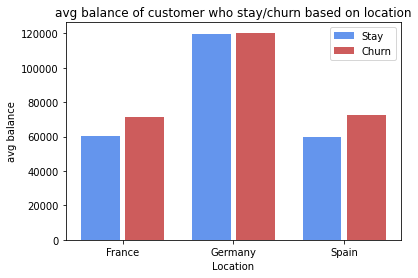

In [ ]:
df_bal = df.groupby(['Geography','Exited'])['Balance'].agg(['count','mean']).reset_index()

#bar chart
labels = ['France','Germany','Spain']


exit = df_bal[df_bal['Exited'].isin([1])]
stay = df_bal[df_bal['Exited'].isin([0])]

x = np.arange(3)  # number of label(groups)
y1 = stay['mean']
y2 = exit['mean']
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
plt.bar(x-0.2,y1 , width, color='cornflowerblue')
plt.bar(x+0.2, y2, width, color='indianred')
plt.xticks(x, labels)
plt.xlabel("Location")
plt.ylabel("avg balance")
plt.title('avg balance of customer who stay/churn based on location')
plt.legend(["Stay", "Churn"])
plt.show()

In [ ]:
df.groupby(['Gender','Exited'])['Balance'].agg(['count','mean','min','max','median'])

count          mean  min        max      median
Gender Exited                                                 
Female 0        3404  71183.249639  0.0  212778.20   89967.165
       1        1139  89036.639359  0.0  238387.56  108076.330
Male   0        4559  73911.607037  0.0  221532.80   93911.300
       1         898  93736.483742  0.0  250898.09  111310.710

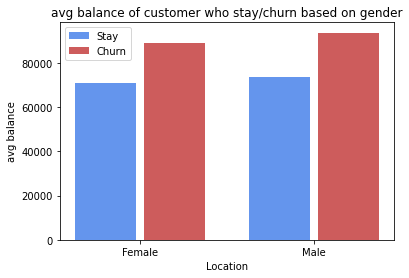

In [ ]:
df_bal = df.groupby(['Gender','Exited'])['Balance'].agg(['count','mean']).reset_index()

#bar chart
labels = ['Female','Male']


exit = df_bal[df_bal['Exited'].isin([1])]
stay = df_bal[df_bal['Exited'].isin([0])]

x = np.arange(2)  # number of label(groups)
y1 = stay['mean']
y2 = exit['mean']
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
plt.bar(x-0.2,y1 , width, color='cornflowerblue')
plt.bar(x+0.2, y2, width, color='indianred')
plt.xticks(x, labels)
plt.xlabel("Location")
plt.ylabel("avg balance")
plt.title('avg balance of customer who stay/churn based on gender')
plt.legend(["Stay", "Churn"])
plt.show()

### based on estimated salary

In [ ]:
df.groupby(['Exited'])['EstimatedSalary'].agg(['count','mean','min','max','median'])

,count,mean,min,max,median
Exited,,,,,
0,7963,99738.391772,90.07,199992.48,99645.04
1,2037,101465.677531,11.58,199808.10,102460.84


### based on active member

In [ ]:
df_act_exit = df.groupby(['Exited','IsActiveMember'])['IsActiveMember'].agg(['count'])
df_act_exit['%'] = 100 * df_act_exit['count'] / df_act_exit.groupby('Exited')['count'].transform('sum')
df_act_exit

count          %
Exited IsActiveMember                  
0      0                3547  44.543514
       1                4416  55.456486
1      0                1302  63.917526
       1                 735  36.082474

- 55.46% customer who stay are active members
- 63.92% customer who churned are non-active members

###based on credit card

In [ ]:
df_cc_exit = df.groupby(['Exited','HasCrCard'])['HasCrCard'].agg(['count'])
df_cc_exit['%'] = 100 * df_cc_exit['count'] / df_cc_exit.groupby('Exited')['count'].transform('sum')
df_cc_exit

count          %
Exited HasCrCard                  
0      0           2332  29.285445
       1           5631  70.714555
1      0            613  30.093274
       1           1424  69.906726

- 70.71% customer who stay have credit card
- 69.91% customer who churned have credit card

### based on location

In [ ]:
df_geo_exit = df.groupby(['Geography','Exited'])['Geography'].agg(['count'])

df_geo_exit['%'] = 100 * df_geo_exit['count'] / df_geo_exit.groupby('Geography')['count'].transform('sum')
df_geo_exit

count          %
Geography Exited                  
France    0        4204  83.845233
          1         810  16.154767
Germany   0        1695  67.556796
          1         814  32.443204
Spain     0        2064  83.326605
          1         413  16.673395

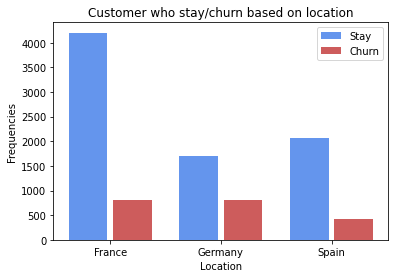

In [ ]:
df_loc = df.groupby(['Geography','Exited'])['Geography'].agg(['count']).reset_index()

#bar chart
labels = ['France','Germany','Spain']


exit = df_loc[df_loc['Exited'].isin([1])]
stay = df_loc[df_loc['Exited'].isin([0])]

x = np.arange(3)  # number of label(groups)
y1 = stay['count']
y2 = exit['count']
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
plt.bar(x-0.2,y1 , width, color='cornflowerblue')
plt.bar(x+0.2, y2, width, color='indianred')
plt.xticks(x, labels)
plt.xlabel("Location")
plt.ylabel("Frequencies")
plt.title('Customer who stay/churn based on location')
plt.legend(["Stay", "Churn"])
plt.show()

insight:
- germany's branch office has the highest churned rate (32.44%)
- Spain and France has similar churned rate, 16.67% and 16.15%, respectively


### Churn by product

In [ ]:
df_prd_exit = df.groupby(['NumOfProducts','Exited'])['NumOfProducts'].agg(['count'])

df_prd_exit['%'] = 100 * df_prd_exit['count'] / df_prd_exit.groupby('NumOfProducts')['count'].transform('sum')
df_prd_exit

count           %
NumOfProducts Exited                   
1             0        3675   72.285602
              1        1409   27.714398
2             0        4242   92.418301
              1         348    7.581699
3             0          46   17.293233
              1         220   82.706767
4             1          60  100.000000

- customers who have the highest churned rate based on number of product owned are those who own 4 products (100%), followed by customers who own 3 products (82.7%)
- 27.7% customers who only own 1 product churned
- customers who own 2 products has the lowest churned rate (7.58%)

## Hypothesis

1. Customer who left the bank has lower credit score
compared to customer who stays - Wigas
2. Customer who left the bank are younger compared to customer who stays - Wily
3. Customer who left the bank has shorter tenure compared to customer who stays - Karin
4. Customer who left the bank has lower account balance compared to customer who stays - Fikry
5. Customer who left the bank has lower salaries compared to customer who stays - Anggrainy
6. Active customers are less likely to leave the bank compared to non active customers - Wigas
7. Customers who have credit cards are less likely to leave the bank than customers who don't have credit cards - Wily
8. There is a specific location that has a high total customer churn and a high percentage of churn rate as well - Karin

# Encode the categorical data

In [ ]:
#encode data categorical (>2 category)
#set up the ordering
credscore_cat = pd.CategoricalDtype(['Very Poor','Poor','Fair','Good','Excellent'],ordered=True)

age_cat = pd.CategoricalDtype(['18-24','25-34','35-44','45-54','55-64','65+'],ordered=True)



#Apply ordering to column and code
df_cat = df.copy()
df_cat['CreditScore_Group'] = df_cat['CreditScore_Group'].astype(credscore_cat)
df_cat['CreditScore_Group'] = df_cat['CreditScore_Group'].cat.codes

df_cat['Age_Group'] = df_cat['Age_Group'].astype(age_cat)
df_cat['Age_Group'] = df_cat['Age_Group'].cat.codes



#encode data gender (2 category)
df_cat['Gender'] =df_cat['Gender'].astype('category').cat.codes

df_cat.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Group
0,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,2,2
1,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,2,2
2,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,2,1
3,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,2,3
4,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,2,4


In [ ]:
#encode data country with get dummies
df_en = pd.get_dummies(df_cat, columns=['Geography','NumOfProducts'])
df_en

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Group,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,15634602,Hargrave,619,0,42,2,0.00,1,1,101348.88,1,2,2,1,0,0,1,0,0,0
1,15647311,Hill,608,0,41,1,83807.86,0,1,112542.58,0,2,2,0,0,1,1,0,0,0
2,15619304,Onio,502,0,42,8,159660.80,1,0,113931.57,1,2,1,1,0,0,0,0,1,0
3,15701354,Boni,699,0,39,1,0.00,0,0,93826.63,0,2,3,1,0,0,0,1,0,0
4,15737888,Mitchell,850,0,43,2,125510.82,1,1,79084.10,0,2,4,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,1,39,5,0.00,1,0,96270.64,0,2,3,1,0,0,0,1,0,0
9996,15569892,Johnstone,516,1,35,10,57369.61,1,1,101699.77,0,2,1,1,0,0,1,0,0,0
9997,15584532,Liu,709,0,36,7,0.00,0,1,42085.58,1,2,3,1,0,0,1,0,0,0
9998,15682355,Sabbatini,772,1,42,3,75075.31,1,0,92888.52,1,2,3,0,1,0,0,1,0,0


# Correlation

In [ ]:
df_en_corr = df_en.drop(['Age_Group','CreditScore_Group','Surname','CustomerId'],axis=1)

correlation matrix

<ipython-input-58-a14f7c3fe0f4>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr, dtype=np.bool))


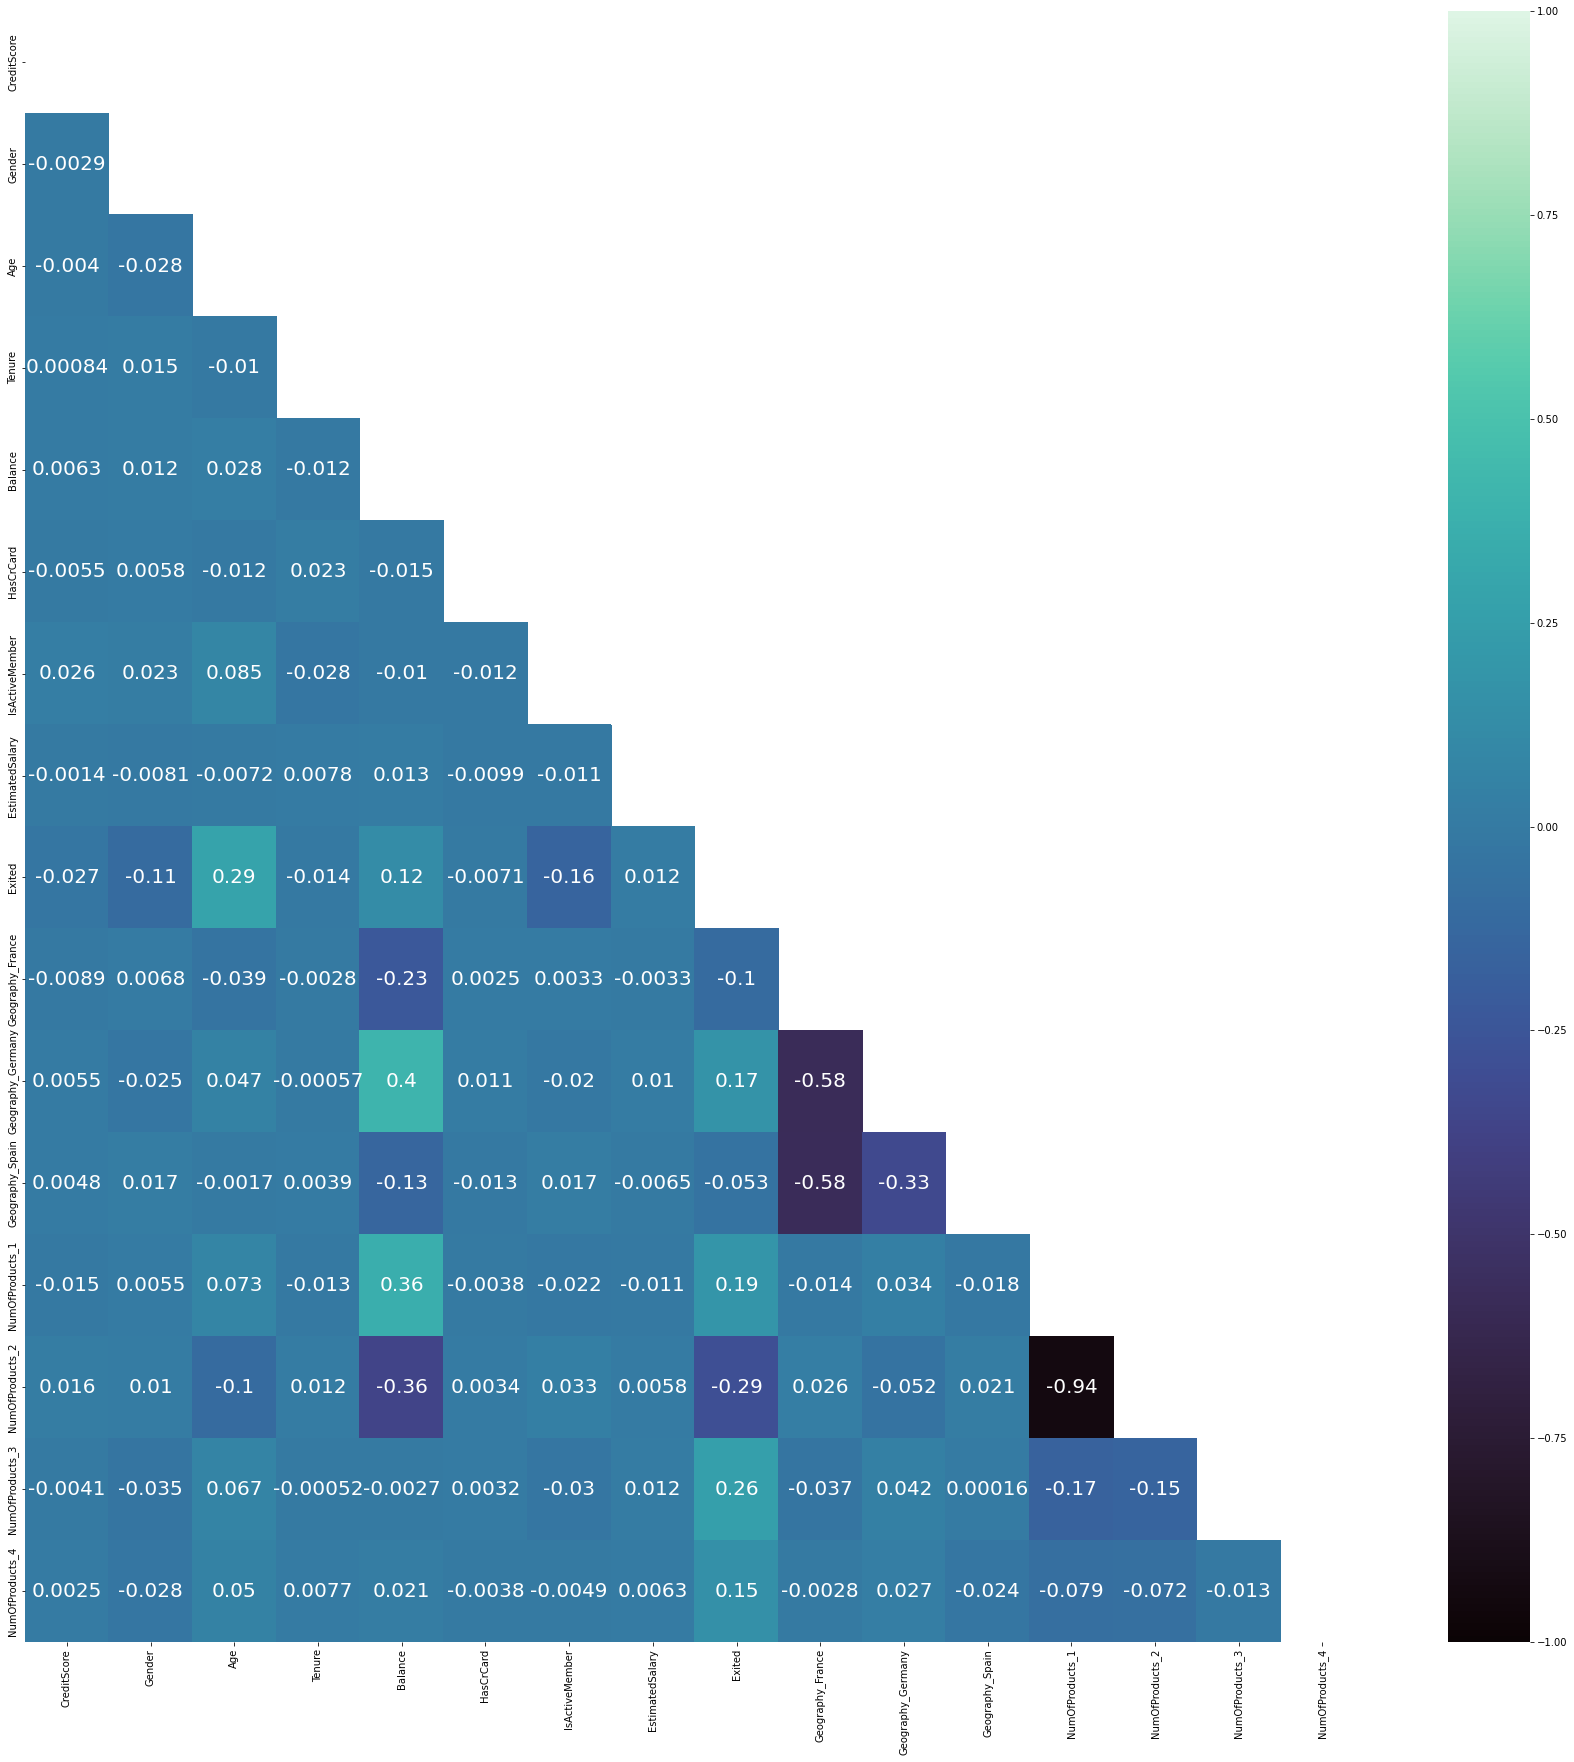

In [ ]:
corr = df_en_corr.corr()

#create heatmap
fig = plt.figure(figsize=(30,30))

mask = mask = np.triu(np.ones_like(
    corr, dtype=np.bool))

sns.heatmap(corr,vmin=-1,
            vmax=1,cmap='mako',annot=True, mask=mask,
            annot_kws={"fontsize":20})
plt.show()


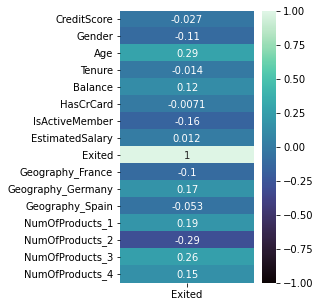

In [ ]:
df_corr_ext = pd.DataFrame(corr['Exited'],
              index=corr.index)

#sns.heatmap(df_corr_ext, annot=True, fmt="g", cmap='viridis')
fig = plt.figure(figsize=(3,5))

sns.heatmap(df_corr_ext,vmin=-1,
            vmax=1,cmap='mako',annot=True,
            annot_kws={"fontsize":10})

plt.show()

correlation with Exited variable

In [ ]:
df_en_corr.corrwith(df_en_corr['Exited']).sort_values(ascending=False)


Exited               1.000000
Age                  0.285323
NumOfProducts_3      0.255862
NumOfProducts_1      0.185447
Geography_Germany    0.173488
NumOfProducts_4      0.153612
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender              -0.106512
IsActiveMember      -0.156128
NumOfProducts_2     -0.292474
dtype: float64

##check p-value

1. Tingkat signifikansi (5%) dibandingkan dengan p-value
2. p-value < 5% : H0 bisa ditolak, H1 "diterima"
3. p-value >= 5%: H0 tidak bisa ditolak

In [ ]:
x1 = df_en['Age']
x2 = df_en['IsActiveMember']
y = df_en['Exited']

In [ ]:
(r,p_value) = stats.pearsonr(x1, y)
print('Age Correlation : ',r)
print('p-value:', p_value)

Age Correlation :  0.28532303783506824
p-value: 1.2399313093495365e-186


In [ ]:
(r,p_value) = stats.pearsonr(x2, y)
print('Active Member : ',r)
print('p-value:', p_value)

Active Member :  -0.1561282781889048
p-value: 1.3482685164949119e-55


# Churn Prediction Model

##Logistic Regression*

In [ ]:
df_en.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Age_Group', 'CreditScore_Group', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [ ]:
df_en_clean = df_en.drop(['Age_Group','CreditScore_Group','Surname','CustomerId','Geography_France',
       'Geography_Germany', 'Geography_Spain'],axis=1)

In [ ]:
# Separate Churn from other variables
to_keep_vars = list(set(df_en_clean) - set(['Exited']))
to_keep_vars

['EstimatedSalary',
 'NumOfProducts_2',
 'CreditScore',
 'NumOfProducts_3',
 'Gender',
 'HasCrCard',
 'Tenure',
 'NumOfProducts_4',
 'IsActiveMember',
 'Balance',
 'NumOfProducts_1',
 'Age']

In [ ]:
from sklearn.model_selection import train_test_split

# Define the whole data
x = df_en_clean[to_keep_vars]
y = df_en_clean[['Exited']]

# Split into training and test dataset
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
# Check split result
for df_en_clean in [x_training, x_test, y_training, y_test]:
  print(df_en_clean.shape)

(8000, 12)
(2000, 12)
(8000, 1)
(2000, 1)


In [ ]:
# Check class balance in each datasets
for df_en_clean in [y_training,y_test]:
  df2 = df_en_clean.value_counts()
  print(df2)

Exited
0         6356
1         1644
dtype: int64
Exited
0         1607
1          393
dtype: int64


In [ ]:
# class_weight='balanced' untuk memastikan hasil logistic regression-nya tidak condong untuk memprediksi No sebanyak-banyaknya
# max_iter=500 untuk memastikan hasil paling bagus/hasilnya "convergent". Kalau misal ketemu error convergent, naikkan max_iter-nya dr 100 (default) ke 500.
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_training, y_training)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
# Accuracy dr prediksi model dengan data training
model.score(x_training, y_training)

0.664375

In [ ]:
# Accuracy dr prediksi model dengan data testing
model.score(x_test, y_test)

0.6545

###confusion matrix

In [ ]:
# confusion_matrix(churn actual, churn prediksi)
confusion_matrix(y_training, model.predict(x_training))

array([[4214, 2142],
       [ 543, 1101]])

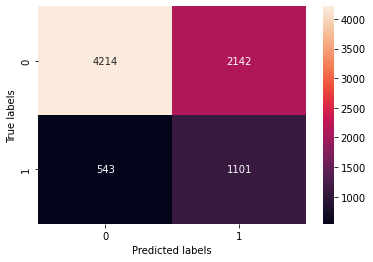

In [ ]:
#0 = tidak churn
#1 = churn

#check confusion matrix on training dataset
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(x_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

Churn prediction model results in training dataset:
- 1101 customers predicted to churn and actually churned
- 4214 customers predicted to stay and actually stay
- 2142 customers who actually stay, predicted to churned
- 543 customers whi actually churned, predicted to stay



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_training, model.predict(x_training), target_names=['Not Churn','Churn']))

              precision    recall  f1-score   support

   Not Churn       0.89      0.66      0.76      6356
       Churn       0.34      0.67      0.45      1644

    accuracy                           0.66      8000
   macro avg       0.61      0.67      0.60      8000
weighted avg       0.77      0.66      0.70      8000



### Check performance on the test set

In [ ]:
model.score(x_test, y_test)

0.6545

In [ ]:
confusion_matrix(y_test, model.predict(x_test))

array([[1046,  561],
       [ 130,  263]])

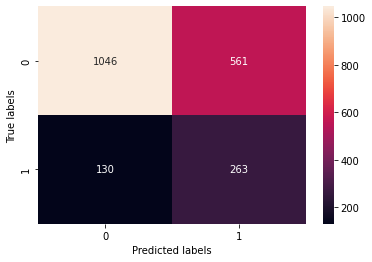

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

###Classification Report


In [ ]:
print(classification_report(y_test, model.predict(x_test), target_names=['Not Churn','Churn']))

              precision    recall  f1-score   support

   Not Churn       0.89      0.65      0.75      1607
       Churn       0.32      0.67      0.43       393

    accuracy                           0.65      2000
   macro avg       0.60      0.66      0.59      2000
weighted avg       0.78      0.65      0.69      2000



precision:
- 89% of customer (in test data set) that predicted to stay and actually stay (not churn)
- only 32% of customers (in test data set) that predicted to churn and actually churn

accuracy:  
- 65%




## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_training, y_training)

y_pred_dt = dt.predict(x_test)

accuracy_score(y_test,y_pred_dt)

0.7765

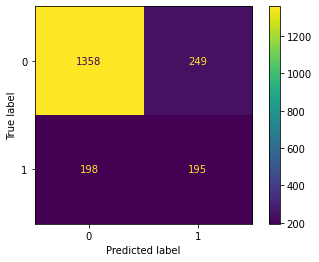

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#0 = tidak churn
#1 = churn

dt_CM = confusion_matrix(y_test, y_pred_dt)
dt_CM
dt_display = ConfusionMatrixDisplay(dt_CM, display_labels = dt.classes_).plot()

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.44      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.79      0.78      0.78      2000



precision:
- 87% prediction for not churn
- 44% prediction for churned

accuracy:  
- 78%

## Feature Importance

to know the impact of each features in the churn prediction model (which feature has the most impact to predict churn)

[code source](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

Logistic Regression
- The positive scores indicate a feature that predicts class 1 (churned), whereas the negative scores indicate a feature that predicts class 0 (not churned).

Feature: 0, Score: -0.00000
Feature: 1, Score: -0.14292
Feature: 2, Score: -0.00309
Feature: 3, Score: 0.04379
Feature: 4, Score: -0.06606
Feature: 5, Score: -0.01346
Feature: 6, Score: -0.11652
Feature: 7, Score: 0.01045
Feature: 8, Score: -0.09539
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.07066
Feature: 11, Score: 0.06006


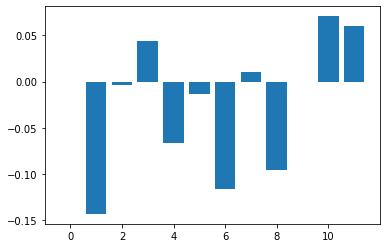

In [ ]:
#feature importance of logistic regression
#get importance
importance = model.coef_[0]

#summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' %(i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Decision Tree

Feature: 0, Score: 0.17253
Feature: 1, Score: 0.05694
Feature: 2, Score: 0.15153
Feature: 3, Score: 0.04002
Feature: 4, Score: 0.02006
Feature: 5, Score: 0.01329
Feature: 6, Score: 0.08683
Feature: 7, Score: 0.00686
Feature: 8, Score: 0.06574
Feature: 9, Score: 0.14501
Feature: 10, Score: 0.01641
Feature: 11, Score: 0.22478


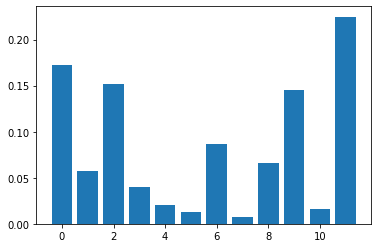

In [ ]:
# decision tree feature importance
# get importance
importance2 = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance2):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance2))], importance2)
plt.show()

## Benefit-Cost Analysis

Suppose we want to get a campaign to top 50% of users with highest probability to churn, with goal to prevent them to churn.

We can first predict probability for all users, and get the top 50% users:


In [ ]:
df_en

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Group,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,15634602,Hargrave,619,0,42,2,0.00,1,1,101348.88,1,2,2,1,0,0,1,0,0,0
1,15647311,Hill,608,0,41,1,83807.86,0,1,112542.58,0,2,2,0,0,1,1,0,0,0
2,15619304,Onio,502,0,42,8,159660.80,1,0,113931.57,1,2,1,1,0,0,0,0,1,0
3,15701354,Boni,699,0,39,1,0.00,0,0,93826.63,0,2,3,1,0,0,0,1,0,0
4,15737888,Mitchell,850,0,43,2,125510.82,1,1,79084.10,0,2,4,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,1,39,5,0.00,1,0,96270.64,0,2,3,1,0,0,0,1,0,0
9996,15569892,Johnstone,516,1,35,10,57369.61,1,1,101699.77,0,2,1,1,0,0,1,0,0,0
9997,15584532,Liu,709,0,36,7,0.00,0,1,42085.58,1,2,3,1,0,0,1,0,0,0
9998,15682355,Sabbatini,772,1,42,3,75075.31,1,0,92888.52,1,2,3,0,1,0,0,1,0,0


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
predicted_prob = model.predict_proba(x)
predicted_prob = pd.DataFrame(predicted_prob[:,1], columns = ['predicted_score'])
predicted_prob

,predicted_score
0,0.565968
1,0.668388
2,0.653148
3,0.463434
4,0.531904
...,...
9995,0.285743
9996,0.353463
9997,0.286686
9998,0.449667


In [ ]:
# Get 50% threshold
pct50_threshold = predicted_prob['predicted_score'].quantile(0.5)

# Get top 50% customers
pct50_customer = predicted_prob[predicted_prob['predicted_score'] > pct50_threshold]

# Merge with actual churn outcome
pct50_customer = pct50_customer.merge(y, left_index = True, right_index = True)
pct50_customer

,predicted_score,Exited
0,0.565968,1
1,0.668388,0
2,0.653148,1
3,0.463434,0
4,0.531904,0
...,...,...
9981,0.749184,1
9982,0.611105,1
9983,0.486869,0
9986,0.735602,0


In [ ]:
pct50_customer['Exited'].value_counts()

0    3435
1    1565
Name: Exited, dtype: int64

Now, imagine that

- cost of campaign per customer: \$100
- loss if customer churn: \$50
- potential profit if customer churn not churn: \$300

Then the return of the campaign is:

Return = (Benefit of preventing churn) - (Loss if churn happened) - (Cost of marketing campaign)
       
       = ($300 x 3435) - ($50 x 1565) - ($100 x 5000)
       = $452,250

So the expected return of this campaign is $452,250

In [ ]:
(300*3435) - (50*1565) - (100*5000)

452250

#**Customer Segmentation**

- decided to not use cluster analysis (reference : https://towardsdatascience.com/when-clustering-doesnt-make-sense-c6ed9a89e9e6)

In [ ]:
from sklearn.cluster import KMeans                  # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler      # to sacalling different attribut
from sklearn import cluster                         # library that contains algorithms for segmenting
from yellowbrick.cluster import SilhouetteVisualizer    # for perform silhoutte
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import matplotlib.cm as cm                                         # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score   # for perform silhoutte analysis
from sklearn.datasets import make_blobs

In [ ]:
df_cat.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Group
0,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,2,2
1,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,2,2
2,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,2,1
3,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,2,3
4,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,2,4


In [ ]:
df_en.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Age_Group', 'CreditScore_Group', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [ ]:
df_cluster = df_en.copy()

In [ ]:
numerical_column = [
'CreditScore',
'Gender',
'Age',
'Tenure',
'Balance',
'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
      'Geography_France','Age_Group', 'CreditScore_Group',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4',]

In [ ]:
#Transform datanya supaya dia berubah dari range asal menjadi range 0-1
# MinMaxScaler : data yang ada batas alaminya
# StandardScaler : merubah jadi distribusi normal
# RobustScaler : semacam StandardScaler tapi robust terhadap outlier

#scaler = MinMaxScaler()
scaler = StandardScaler()
df_cluster[numerical_column] = scaler.fit_transform(df_cluster[numerical_column])
df_cluster

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Group,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,15634602,Hargrave,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,0.646092,0.970243,0.021886,1.977165,0.059177,-0.173167,0.997204,-0.578736,-0.573809,0.983339,-0.921102,-0.165308,-0.077693
1,15647311,Hill,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-1.547768,0.970243,0.216534,-0.505775,0.059177,-0.173167,-1.002804,-0.578736,1.742740,0.983339,-0.921102,-0.165308,-0.077693
2,15619304,Onio,-1.536794,-1.095988,0.293517,1.032908,1.333053,0.646092,-1.030670,0.240687,1.977165,0.059177,-1.082179,0.997204,-0.578736,-0.573809,-1.016944,-0.921102,6.049296,-0.077693
3,15701354,Boni,0.501521,-1.095988,0.007457,-1.387538,-1.225848,-1.547768,-1.030670,-0.108918,-0.505775,0.059177,0.735845,0.997204,-0.578736,-0.573809,-1.016944,1.085656,-0.165308,-0.077693
4,15737888,Mitchell,2.063884,-1.095988,0.388871,-1.041760,0.785728,0.646092,0.970243,-0.365276,-0.505775,0.059177,1.644857,-1.002804,-0.578736,1.742740,0.983339,-0.921102,-0.165308,-0.077693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,1.246488,0.912419,0.007457,-0.004426,-1.225848,0.646092,-1.030670,-0.066419,-0.505775,0.059177,0.735845,0.997204,-0.578736,-0.573809,-1.016944,1.085656,-0.165308,-0.077693
9996,15569892,Johnstone,-1.391939,0.912419,-0.373958,1.724464,-0.306379,0.646092,0.970243,0.027988,-0.505775,0.059177,-1.082179,0.997204,-0.578736,-0.573809,0.983339,-0.921102,-0.165308,-0.077693
9997,15584532,Liu,0.604988,-1.095988,-0.278604,0.687130,-1.225848,-1.547768,0.970243,-1.008643,1.977165,0.059177,0.735845,0.997204,-0.578736,-0.573809,0.983339,-0.921102,-0.165308,-0.077693
9998,15682355,Sabbatini,1.256835,0.912419,0.293517,-0.695982,-0.022608,0.646092,-1.030670,-0.125231,1.977165,0.059177,0.735845,-1.002804,1.727904,-0.573809,-1.016944,1.085656,-0.165308,-0.077693


## Cluster

In [ ]:
df_cluster.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Age_Group', 'CreditScore_Group', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [ ]:
df_cluster1 = df_cluster.drop(columns=['Surname', 'HasCrCard', 'IsActiveMember', 'Exited','Age_Group', 'CreditScore_Group','Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'])
df_cluster1.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,EstimatedSalary
0,15634602,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,0.021886
1,15647311,-0.440036,-1.095988,0.198164,-1.387538,0.117350,0.216534
2,15619304,-1.536794,-1.095988,0.293517,1.032908,1.333053,0.240687
3,15701354,0.501521,-1.095988,0.007457,-1.387538,-1.225848,-0.108918
4,15737888,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.365276


In [ ]:
df_cluster1 = df_cluster1.set_index('CustomerId')

1 60000.00000000023
2 49988.04210155393
3 45056.272797370824
4 41330.353833690475
5 37903.05456906416
6 35535.482333265405
7 33523.54976375101
8 32089.688086956725
9 30729.824064750625
10 29428.15618682122


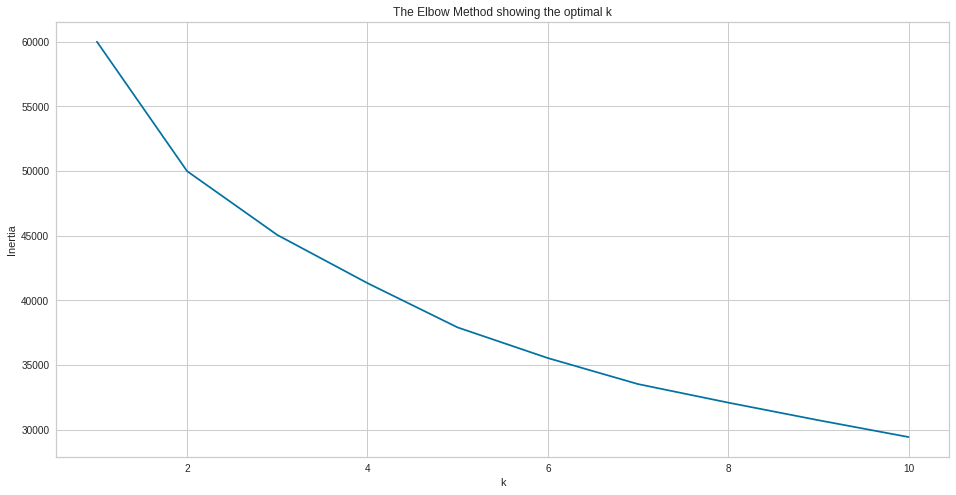

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k,random_state=54)
    kmeanModel.fit(df_cluster1)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For k=2, the average silhouette score is 0.17890413962360346
For k=3, the average silhouette score is 0.16201963709774983
For k=4, the average silhouette score is 0.17937915182521177
For k=5, the average silhouette score is 0.18184393779833447
For k=6, the average silhouette score is 0.1676544719587559
For k=7, the average silhouette score is 0.17029780977321535
For k=8, the average silhouette score is 0.15852284771900452
For k=9, the average silhouette score is 0.16563123289139317
For k=10, the average silhouette score is 0.16889594136991426


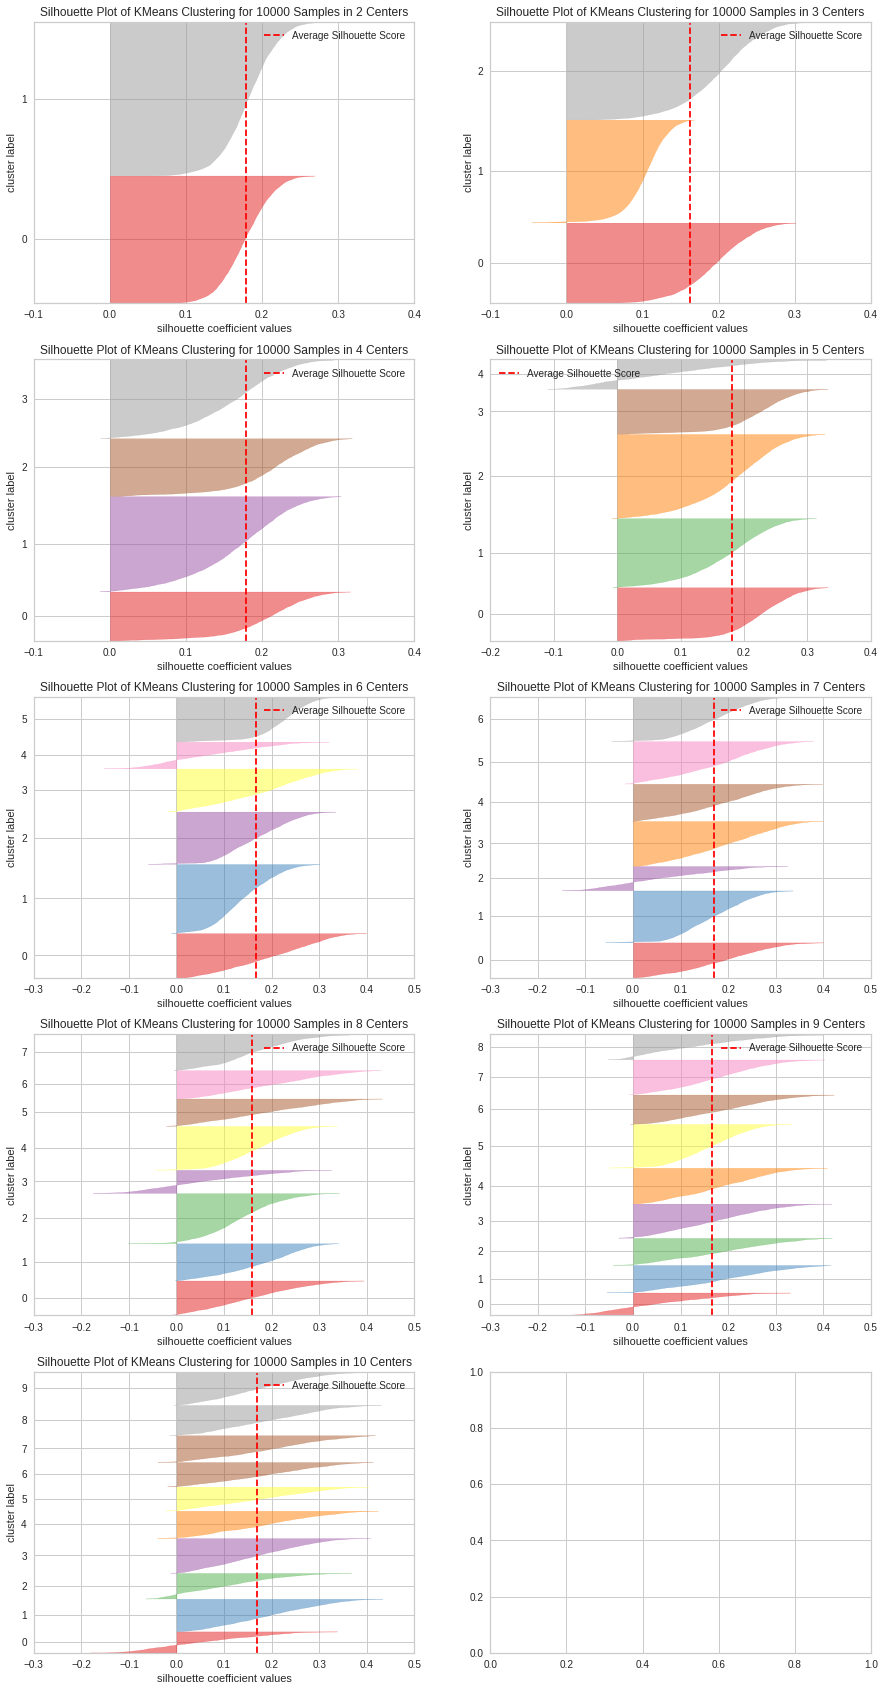

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters,random_state=54)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cluster1)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4,random_state = 53)
cluster_model.fit(df_cluster1)
cluster_label = cluster_model.labels_
df['cluster'] = cluster_label
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Group,cluster
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,35-44,Fair,2
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,35-44,Fair,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,35-44,Poor,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,35-44,Good,2
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,35-44,Excellent,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,35-44,Good,2
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,35-44,Poor,3
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,35-44,Good,2
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,35-44,Good,3


In [ ]:
df.groupby('cluster')['CustomerId'].agg(['count'])

,count
cluster,
0,1116
1,2532
2,3278
3,3074


In [ ]:
df.groupby(['cluster','Exited'])['CustomerId'].agg(['count'])


count
cluster Exited       
0       0         644
        1         472
1       0        1880
        1         652
2       0        2893
        1         385
3       0        2546
        1         528

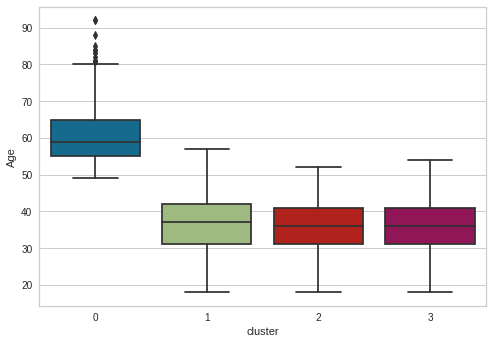

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Age')

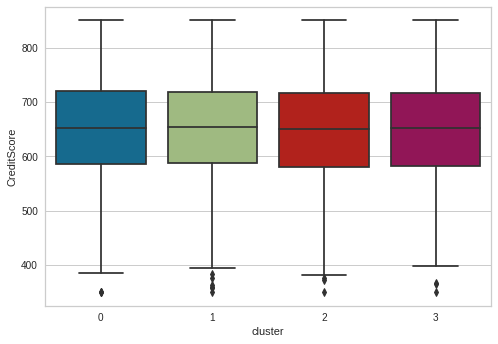

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='CreditScore')

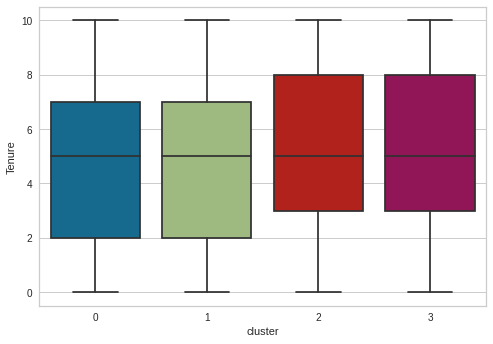

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Tenure')

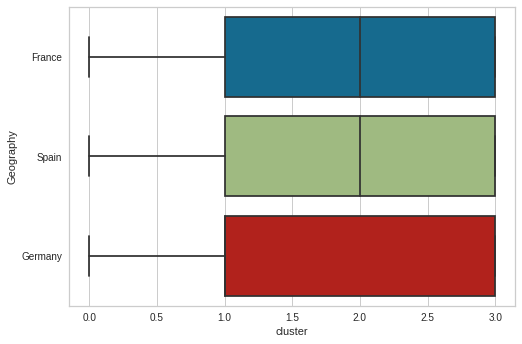

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Geography')

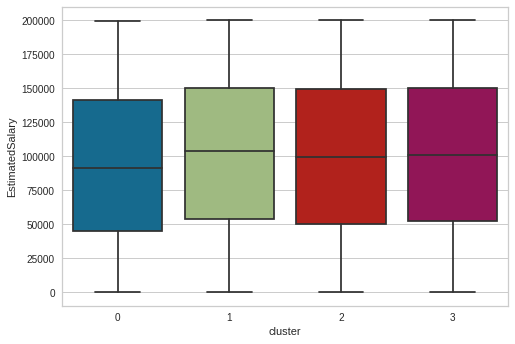

In [ ]:
sns.boxplot(data=df, x='cluster', y='EstimatedSalary')

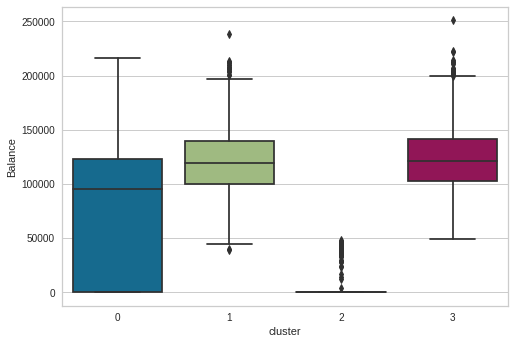

In [ ]:
sns.boxplot(data=df, x='cluster', y='Balance')

##Cluster with Grouped Age & Cred Score

In [ ]:
df_cluster.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Age_Group', 'CreditScore_Group', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [ ]:
df_cluster2 = df_cluster.drop(columns=['Surname', 'HasCrCard', 'IsActiveMember', 'Exited','NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4','Geography_France',
       'Geography_Germany', 'Geography_Spain','Age', 'CreditScore'])
df_cluster2.head()

,CustomerId,Gender,Tenure,Balance,EstimatedSalary,Age_Group,CreditScore_Group
0,15634602,-1.095988,-1.041760,-1.225848,0.021886,0.059177,-0.173167
1,15647311,-1.095988,-1.387538,0.117350,0.216534,0.059177,-0.173167
2,15619304,-1.095988,1.032908,1.333053,0.240687,0.059177,-1.082179
3,15701354,-1.095988,-1.387538,-1.225848,-0.108918,0.059177,0.735845
4,15737888,-1.095988,-1.041760,0.785728,-0.365276,0.059177,1.644857


In [ ]:
df_cluster2 = df_cluster2.set_index('CustomerId')

1 60000.00000000003
2 49986.10445051922
3 45054.758469348366
4 41329.600199451976
5 38145.313292075196
6 36149.10351807269
7 33951.4263453667
8 32178.185992372913
9 30811.52304547168
10 29500.120280216128


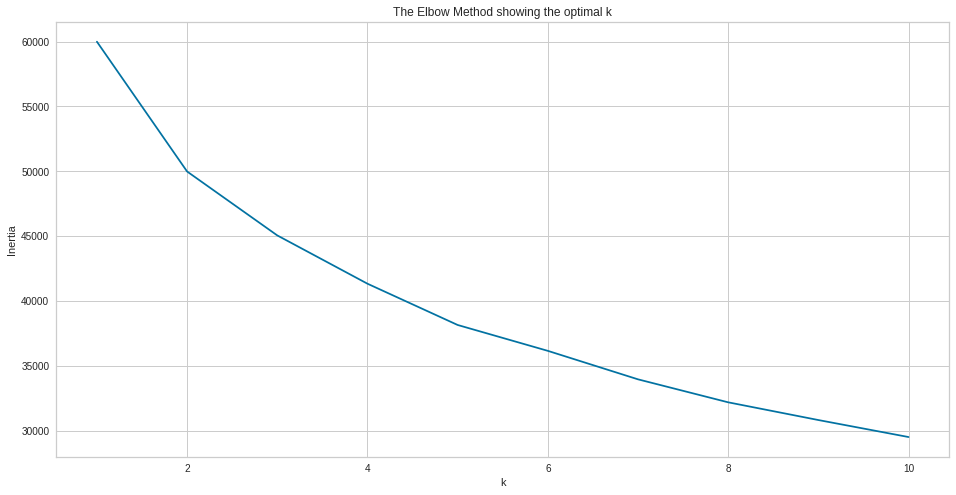

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k,random_state = 53)
    kmeanModel.fit(df_cluster2)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For k=2, the average silhouette score is 0.17777107466702746
For k=3, the average silhouette score is 0.16066721794368036
For k=4, the average silhouette score is 0.17787738724800772
For k=5, the average silhouette score is 0.18244556667146336
For k=6, the average silhouette score is 0.16849543611540402
For k=7, the average silhouette score is 0.1636556669919662
For k=8, the average silhouette score is 0.16340037828050724
For k=9, the average silhouette score is 0.16040775430447105
For k=10, the average silhouette score is 0.16063144725053102


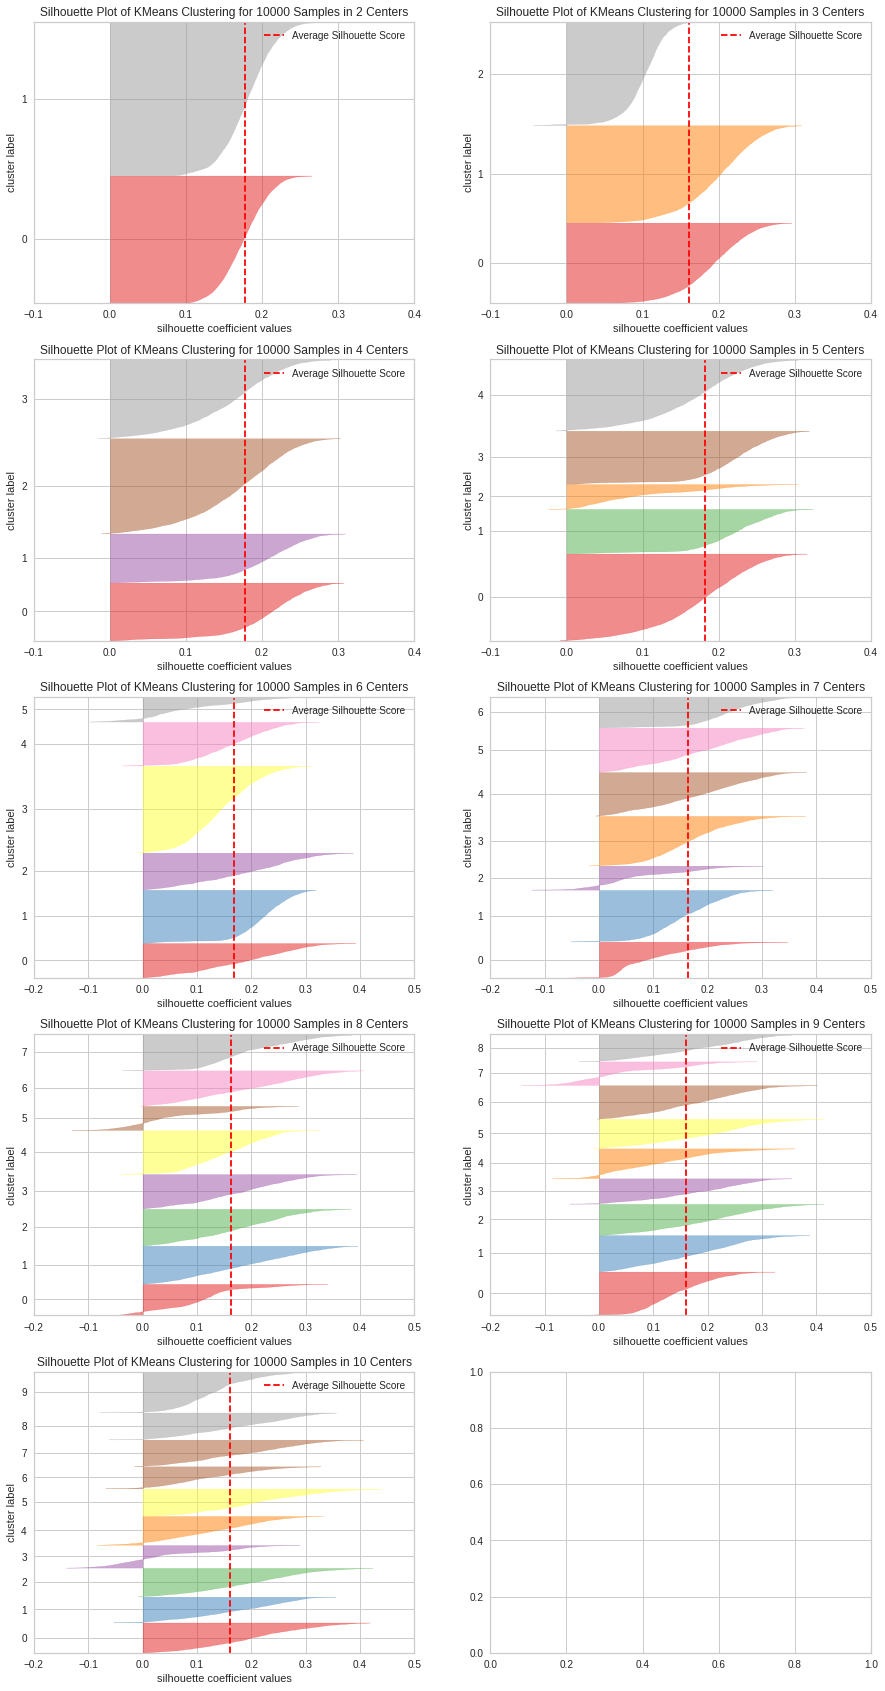

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters,random_state = 53)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cluster2)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4,random_state=54)
cluster_model.fit(df_cluster2)
cluster_label = cluster_model.labels_
df['cluster'] = cluster_label
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Group,cluster
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,35-44,Fair,3
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,35-44,Fair,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,35-44,Poor,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,35-44,Good,3
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,35-44,Excellent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,35-44,Good,1
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,35-44,Poor,1
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,35-44,Good,3
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,35-44,Good,2


In [ ]:
df.groupby('cluster')['CustomerId'].agg(['count'])

,count
cluster,
0,2798
1,2757
2,2700
3,1745


In [ ]:
df.groupby(['cluster','Exited'])['CustomerId'].agg(['count'])



count
cluster Exited       
0       0        1982
        1         816
1       0        2329
        1         428
2       0        2230
        1         470
3       0        1422
        1         323

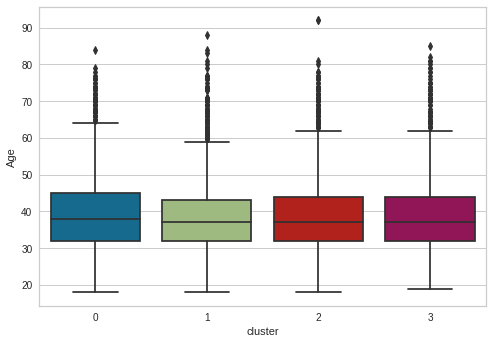

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Age')

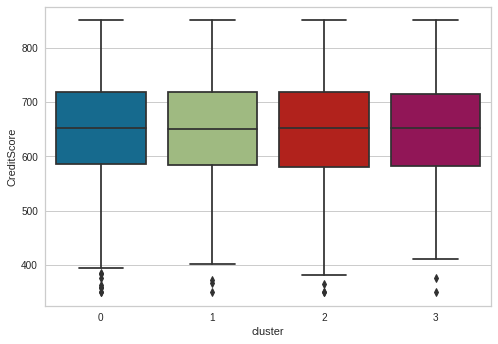

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='CreditScore')

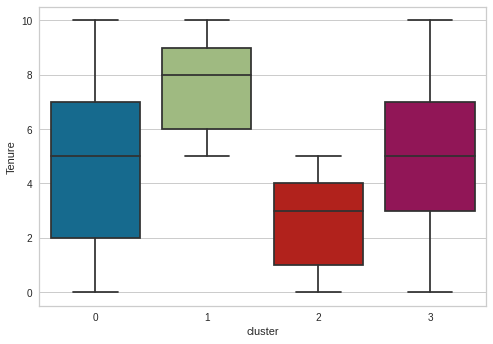

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Tenure')

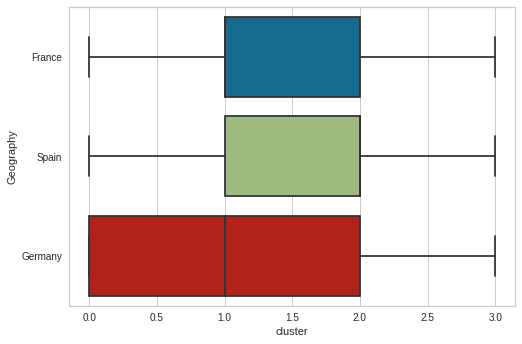

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Geography')

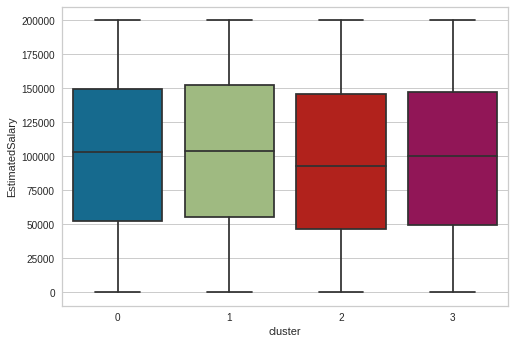

In [ ]:
sns.boxplot(data=df, x='cluster', y='EstimatedSalary')

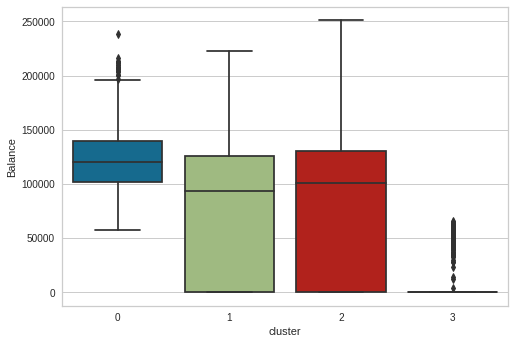

In [ ]:
sns.boxplot(data=df, x='cluster', y='Balance')

In [ ]:
df_cluster.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Age_Group', 'CreditScore_Group', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [ ]:
df_cluster3 = df_cluster.drop(columns=['Surname', 'HasCrCard', 'IsActiveMember', 'Exited','NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4','Geography_France',
       'Geography_Germany', 'Geography_Spain','Age_Group', 'CreditScore_Group','Gender'])
df_cluster3.head()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,0.021886
1,15647311,-0.440036,0.198164,-1.387538,0.117350,0.216534
2,15619304,-1.536794,0.293517,1.032908,1.333053,0.240687
3,15701354,0.501521,0.007457,-1.387538,-1.225848,-0.108918
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.365276


In [ ]:
df_cluster3 = df_cluster3.set_index('CustomerId')

1 50000.00000000001
2 41342.739852680774
3 36543.21554905105
4 32547.246290530253
5 29854.63915033864
6 27454.939957560113
7 25532.334375152175
8 23914.74589153887
9 22571.375122014248
10 21473.719704985862


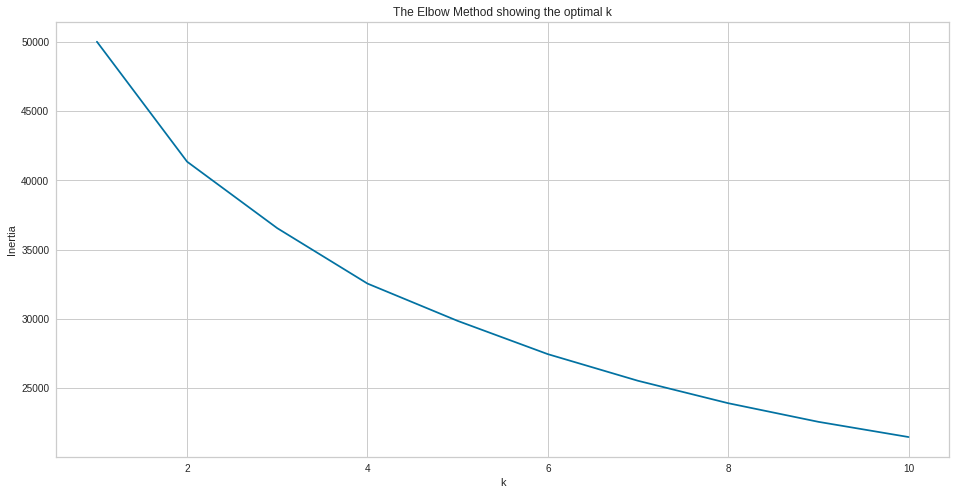

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k,random_state = 53)
    kmeanModel.fit(df_cluster3)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For k=2, the average silhouette score is 0.18814104272059984
For k=3, the average silhouette score is 0.16707977916604688
For k=4, the average silhouette score is 0.17317318439767063
For k=5, the average silhouette score is 0.17359583748289065
For k=6, the average silhouette score is 0.17072716364840204
For k=7, the average silhouette score is 0.17173073550029316
For k=8, the average silhouette score is 0.1777462429948628
For k=9, the average silhouette score is 0.18207447829586296
For k=10, the average silhouette score is 0.17555068026404744


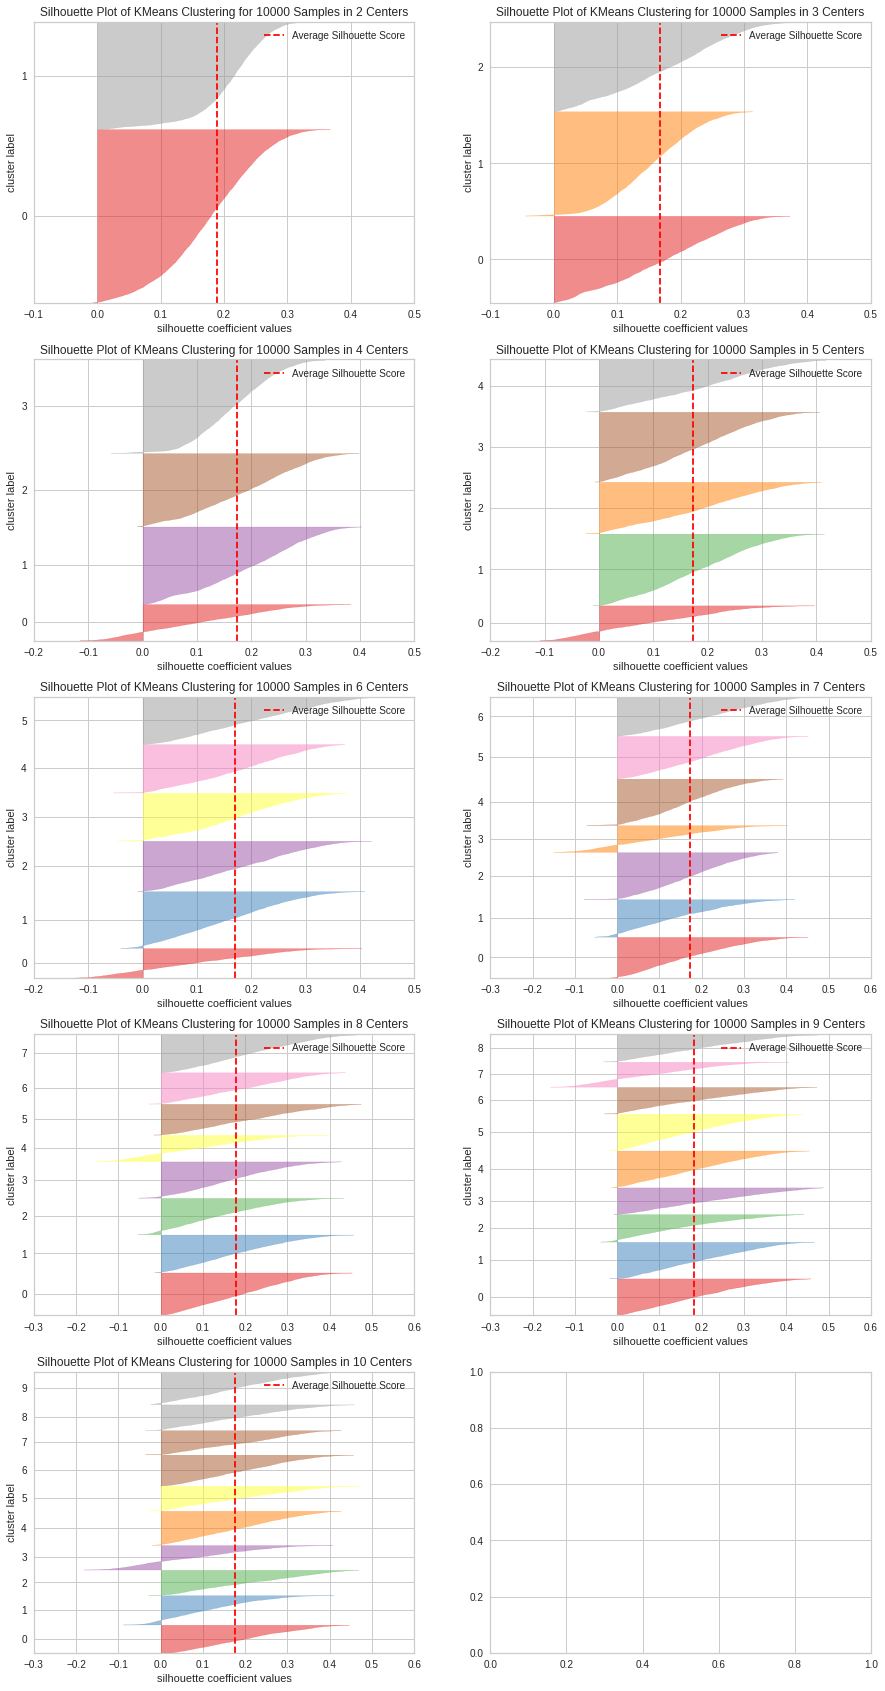

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters,random_state = 53)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cluster3)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4)
cluster_model.fit(df_cluster3)
cluster_label = cluster_model.labels_
df['cluster'] = cluster_label
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Group,cluster
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,35-44,Fair,2
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,35-44,Fair,3
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,35-44,Poor,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,35-44,Good,2
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,35-44,Excellent,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,35-44,Good,2
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,35-44,Poor,1
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,35-44,Good,2
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,35-44,Good,3


In [ ]:
df.groupby('cluster')['CustomerId'].agg(['count'])

,count
cluster,
0,1311
1,2643
2,3329
3,2717


In [ ]:
df.groupby(['cluster','Exited'])['CustomerId'].agg(['count'])


count
cluster Exited       
0       0         734
        1         577
1       0        2098
        1         545
2       0        2929
        1         400
3       0        2202
        1         515

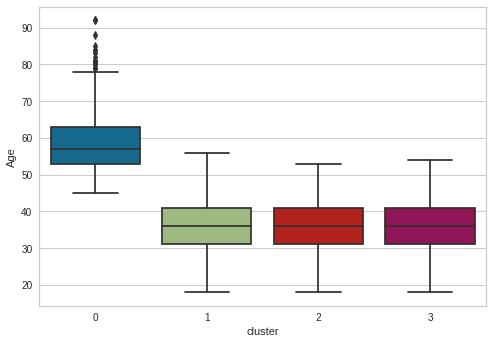

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Age')

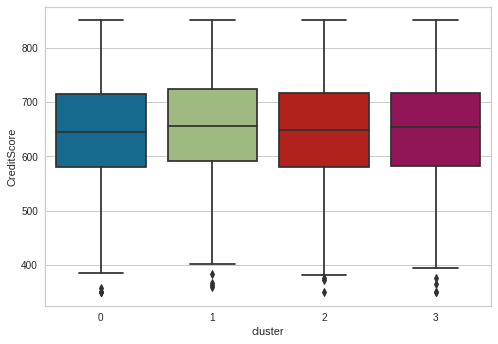

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='CreditScore')

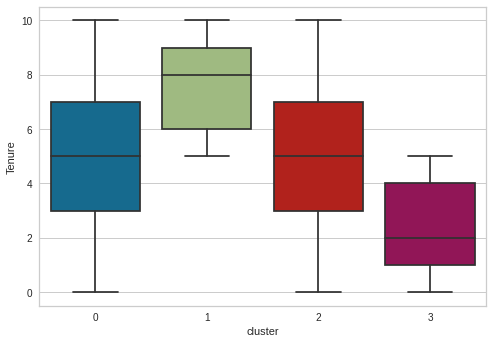

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Tenure')

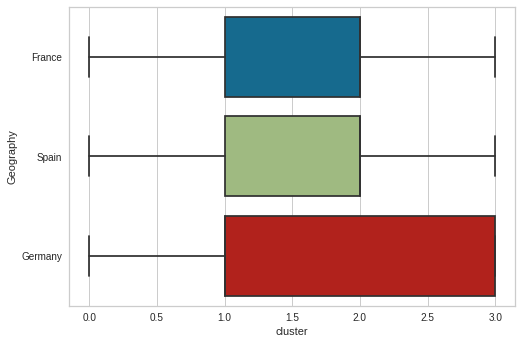

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Geography')

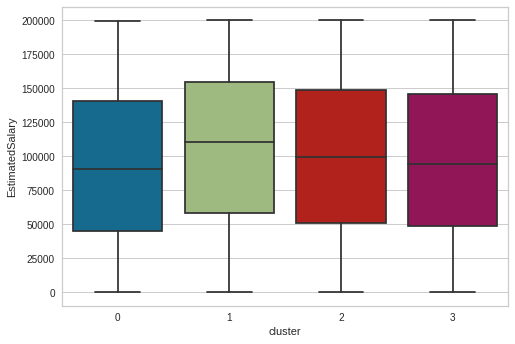

In [ ]:
sns.boxplot(data=df, x='cluster', y='EstimatedSalary')

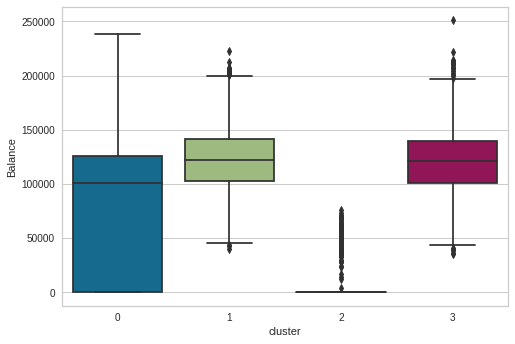

In [ ]:
sns.boxplot(data=df, x='cluster', y='Balance')

In [ ]:
df_cluster.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Age_Group', 'CreditScore_Group', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [ ]:
df_cluster4 = df_cluster.drop(columns=['Surname', 'HasCrCard', 'IsActiveMember', 'Exited','NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4','Geography_France',
       'Geography_Germany', 'Geography_Spain','Age', 'CreditScore','EstimatedSalary'])
df_cluster4.head()

,CustomerId,Gender,Tenure,Balance,Age_Group,CreditScore_Group
0,15634602,-1.095988,-1.041760,-1.225848,0.059177,-0.173167
1,15647311,-1.095988,-1.387538,0.117350,0.059177,-0.173167
2,15619304,-1.095988,1.032908,1.333053,0.059177,-1.082179
3,15701354,-1.095988,-1.387538,-1.225848,0.059177,0.735845
4,15737888,-1.095988,-1.041760,0.785728,0.059177,1.644857


In [ ]:
df_cluster4 = df_cluster4.set_index('CustomerId')

1 49999.99999999989
2 39986.76255094569
3 35057.030928126405
4 31913.887632522154
5 28582.131257291898
6 25869.529939345863
7 23819.847629666125
8 22234.45149757029
9 20932.632266894325
10 19764.31595817259


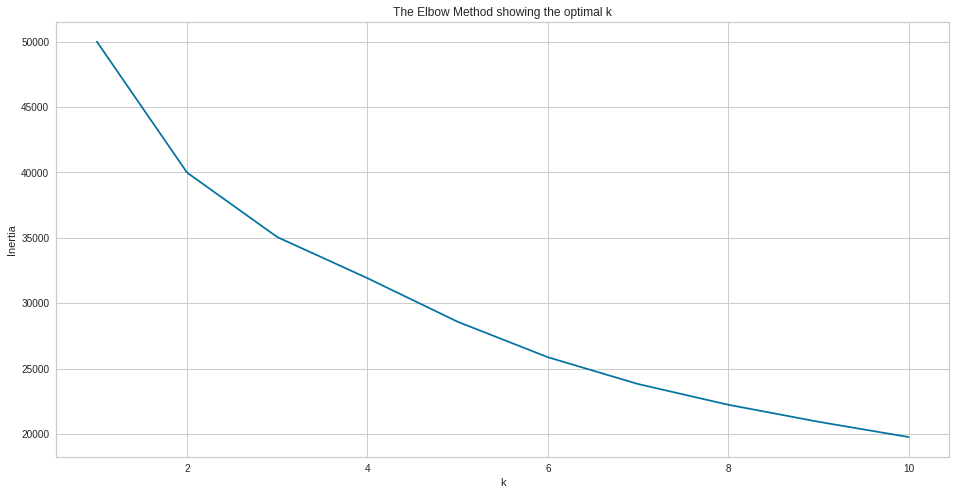

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k,random_state = 46)
    kmeanModel.fit(df_cluster4)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For k=2, the average silhouette score is 0.21557515482950684
For k=3, the average silhouette score is 0.20144364829387332
For k=4, the average silhouette score is 0.2066067204579459
For k=5, the average silhouette score is 0.21729648769559534
For k=6, the average silhouette score is 0.2239271778605263
For k=7, the average silhouette score is 0.21948093005131686
For k=8, the average silhouette score is 0.2164204771546959
For k=9, the average silhouette score is 0.22042462962414283
For k=10, the average silhouette score is 0.21879847584078008


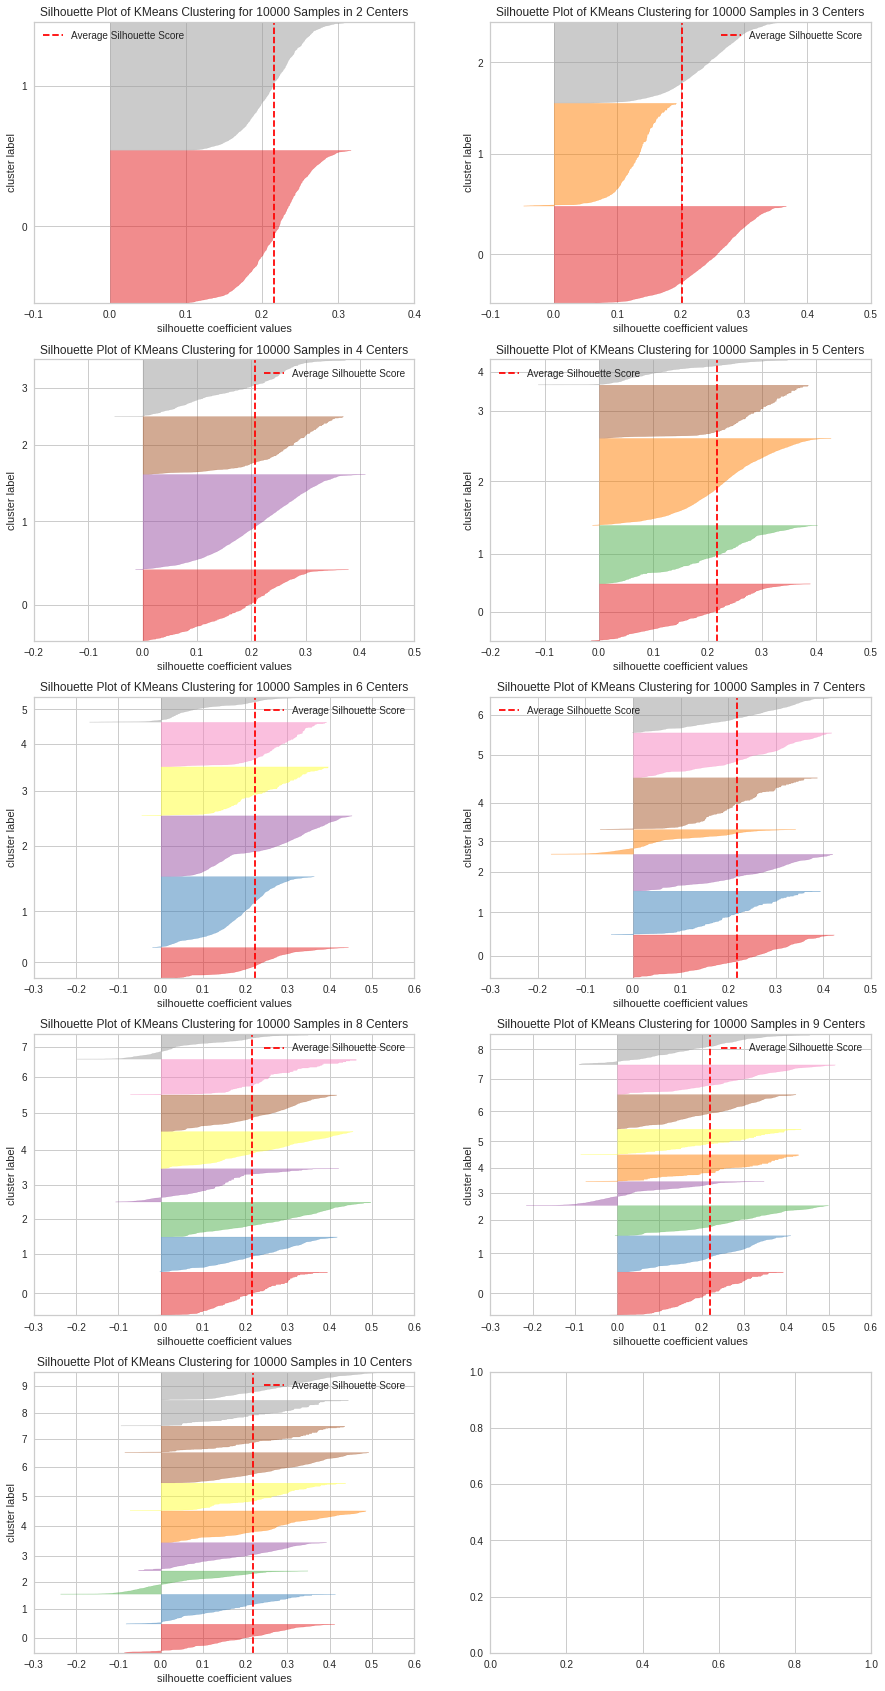

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters,random_state = 46)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cluster4)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4,random_state = 46)
cluster_model.fit(df_cluster4)
cluster_label = cluster_model.labels_
df['cluster'] = cluster_label
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Group,cluster
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,35-44,Fair,3
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,35-44,Fair,3
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,35-44,Poor,3
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,35-44,Good,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,35-44,Excellent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,35-44,Good,2
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,35-44,Poor,2
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,35-44,Good,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,35-44,Good,1


In [ ]:
df.groupby('cluster')['CustomerId'].agg(['count'])

,count
cluster,
0,2541
1,3393
2,2060
3,2006


In [ ]:
df.groupby(['cluster','Exited'])['CustomerId'].agg(['count'])


count
cluster Exited       
0       0        1927
        1         614
1       0        2718
        1         675
2       0        1839
        1         221
3       0        1479
        1         527

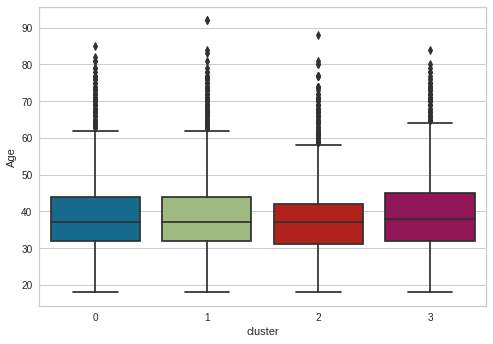

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Age')

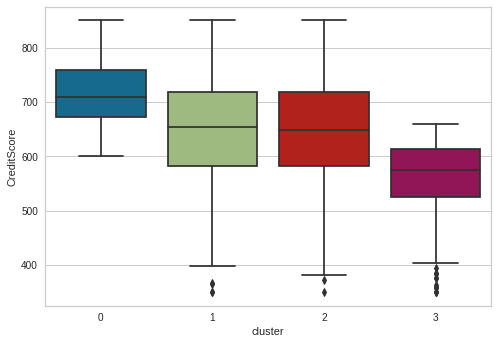

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='CreditScore')

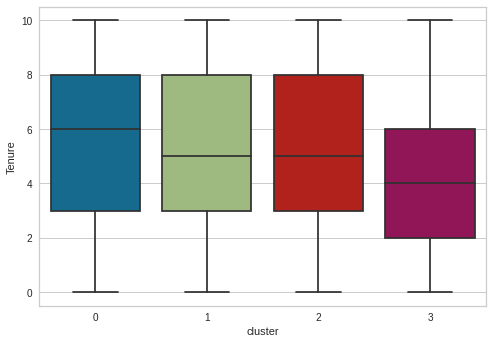

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Tenure')

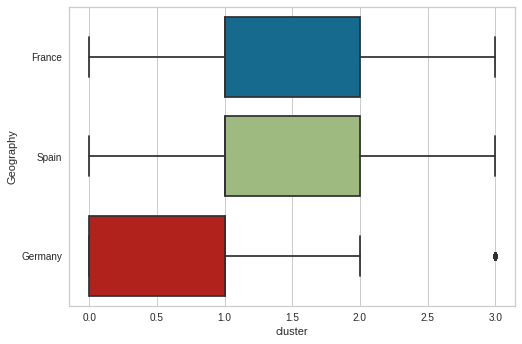

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Geography')

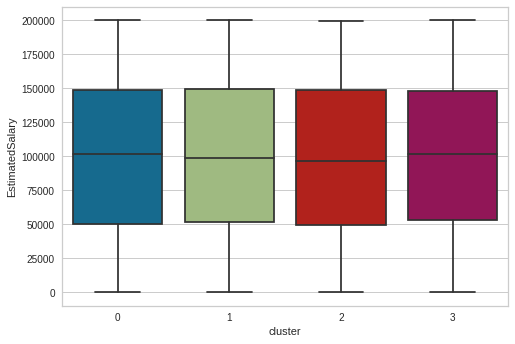

In [ ]:
sns.boxplot(data=df, x='cluster', y='EstimatedSalary')

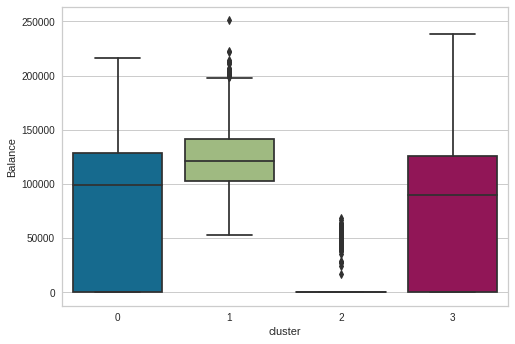

In [ ]:
sns.boxplot(data=df, x='cluster', y='Balance')

In [ ]:
#sns.scatterplot(data = df_cluster, x = 'transaction_id', y = 'total_amount')

In [ ]:
#sns.set(style="ticks", color_codes=True)
#%matplotlib inline

#sns.pairplot(df, hue="cluster")

In [ ]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [ ]:
df_cluster.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Age_Group', 'CreditScore_Group', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [ ]:
df_cluster3 = df_cluster.drop(columns=['Surname', 'HasCrCard', 'IsActiveMember', 'Exited','NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4','Geography_France',
       'Geography_Germany', 'Geography_Spain','Age_Group', 'CreditScore_Group','Gender'])
df_cluster3.head()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,0.021886
1,15647311,-0.440036,0.198164,-1.387538,0.117350,0.216534
2,15619304,-1.536794,0.293517,1.032908,1.333053,0.240687
3,15701354,0.501521,0.007457,-1.387538,-1.225848,-0.108918
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.365276


In [ ]:
df_cluster3 = df_cluster3.set_index('CustomerId')

1 50000.00000000001
2 41342.749212882976
3 36543.30200230479
4 32545.543855998483
5 29858.14982598594
6 27454.22239248884
7 25535.562538325656
8 23912.966629852766
9 22569.816554570374
10 21461.43682704893


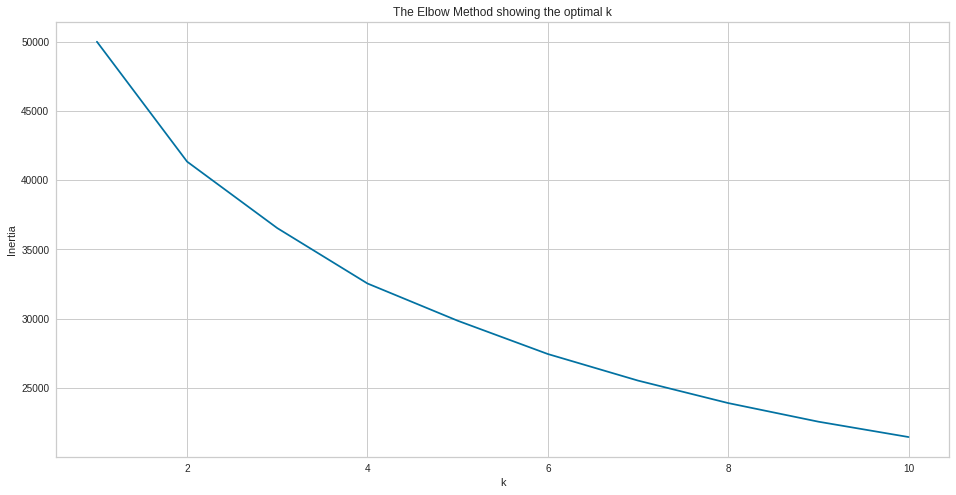

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster3)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For k=2, the average silhouette score is 0.18814104272059984
For k=3, the average silhouette score is 0.16706020239407923
For k=4, the average silhouette score is 0.17290893870537546
For k=5, the average silhouette score is 0.17374427444177018
For k=6, the average silhouette score is 0.17115681084514736
For k=7, the average silhouette score is 0.17137928192483115
For k=8, the average silhouette score is 0.17642619929379935
For k=9, the average silhouette score is 0.18225870839653302
For k=10, the average silhouette score is 0.17734937654072408


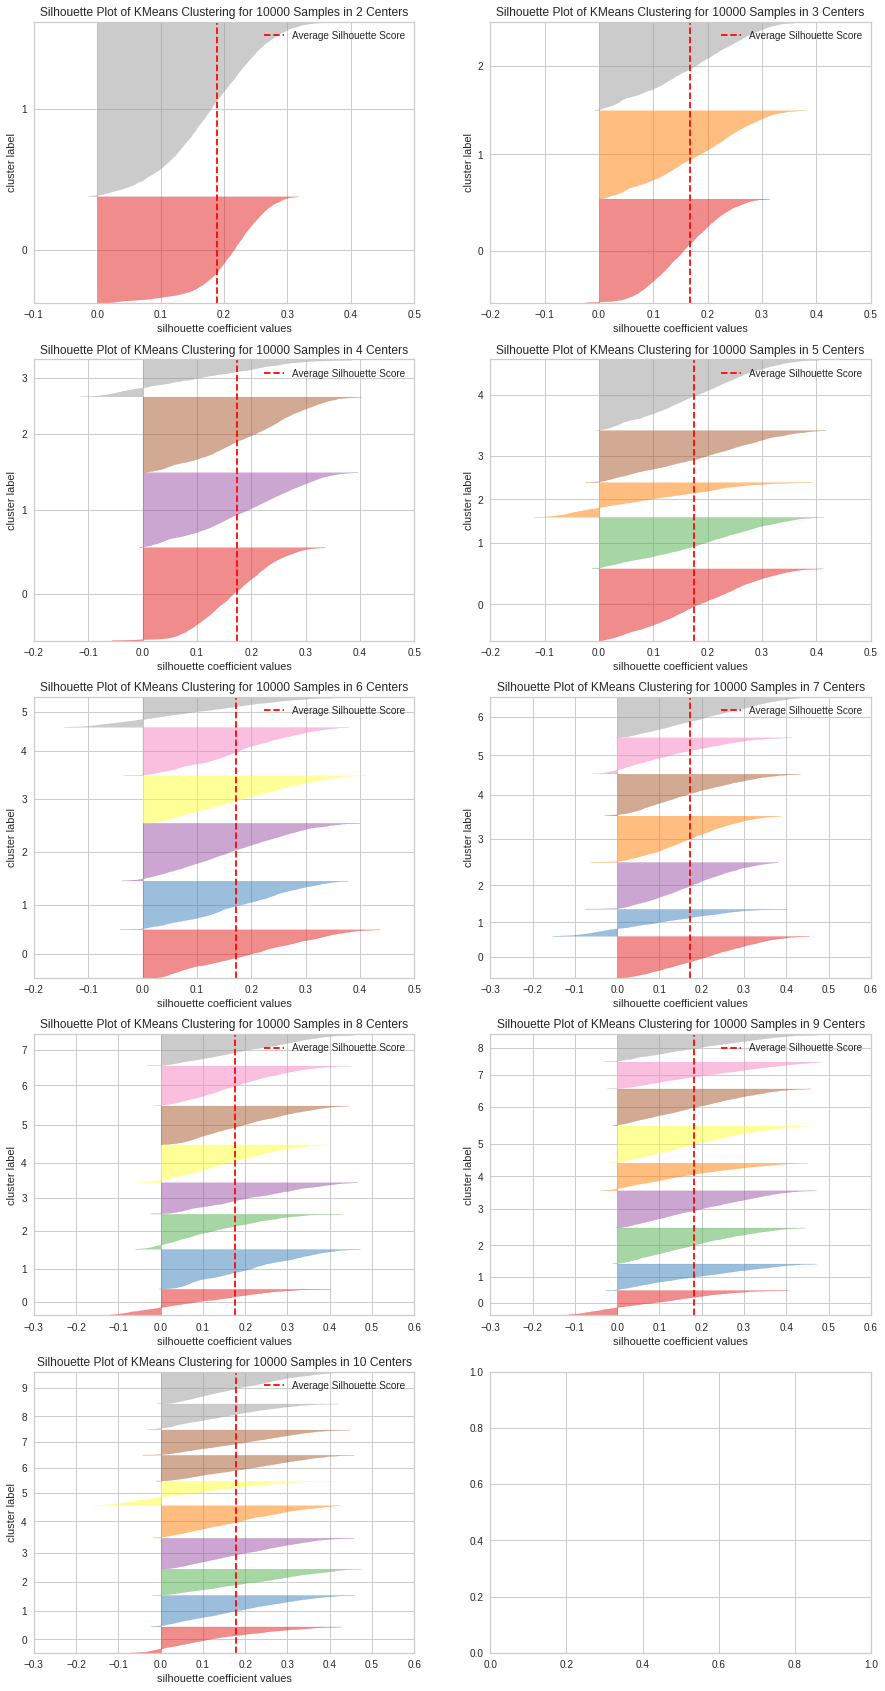

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cluster3)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
cluster_model = cluster.KMeans(n_clusters=5)
cluster_model.fit(df_cluster3)
cluster_label = cluster_model.labels_
df['cluster'] = cluster_label
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScore_Group,cluster
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,35-44,Fair,2
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,35-44,Fair,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,35-44,Poor,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,35-44,Good,4
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,35-44,Excellent,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,35-44,Good,4
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,35-44,Poor,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,35-44,Good,4
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,35-44,Good,1


In [ ]:
df.groupby('cluster')['CustomerId'].agg(['count'])

,count
cluster,
0,2509
1,2573
2,1799
3,1238
4,1881


In [ ]:
df.groupby(['cluster','Exited'])['CustomerId'].agg(['count'])


count
cluster Exited       
0       0        1995
        1         514
1       0        2076
        1         497
2       0        1542
        1         257
3       0         696
        1         542
4       0        1654
        1         227

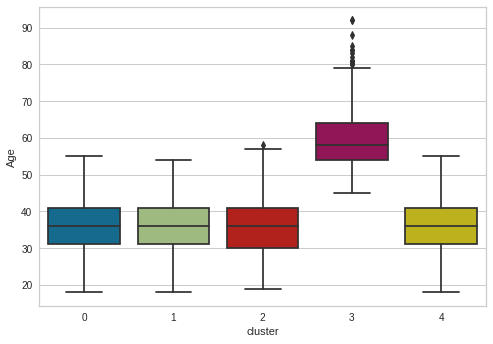

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Age')

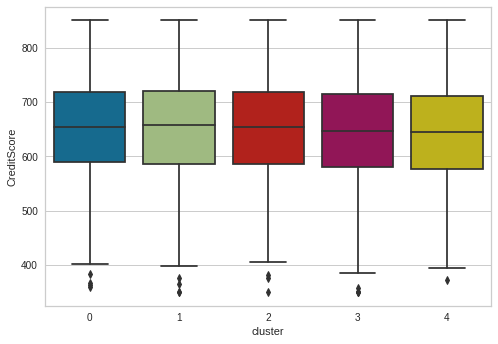

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='CreditScore')

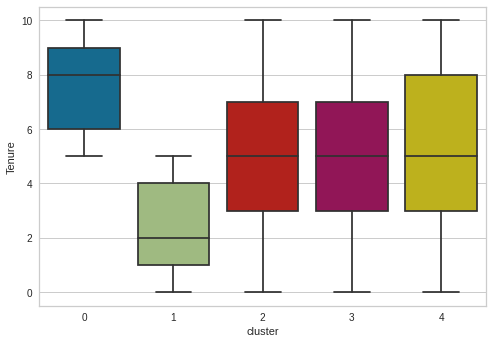

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Tenure')

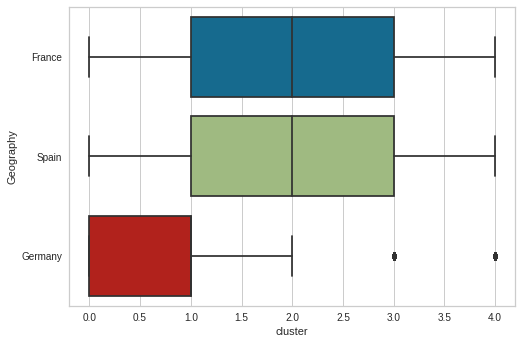

In [ ]:
sns.boxplot (data =df , x ='cluster' , y ='Geography')

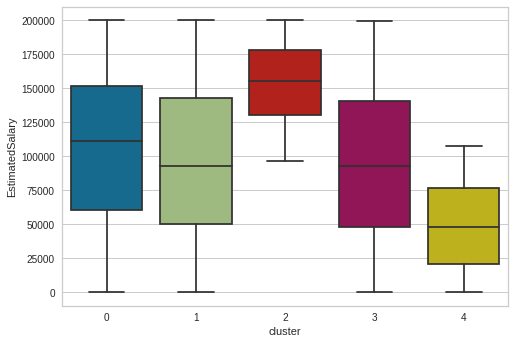

In [ ]:
sns.boxplot(data=df, x='cluster', y='EstimatedSalary')

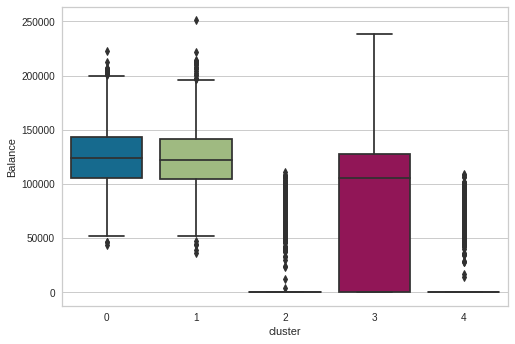

In [ ]:
sns.boxplot(data=df, x='cluster', y='Balance')

## Interpreting the cluster

### Descriptive Statistic

In [ ]:
pd.set_option('display.max_columns',None)
df.groupby('cluster')['CreditScore','Age','Balance','Tenure','EstimatedSalary'].agg(['count','mean','min','max','median'])

<ipython-input-170-653895e423c6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster')['CreditScore','Age','Balance','Tenure','EstimatedSalary'].agg(['count','mean','min','max','median'])


CreditScore                                Age                     \
              count        mean  min  max median count       mean min max   
cluster                                                                     
0              2509  652.404544  359  850  654.0  2509  36.192108  18  55   
1              2573  653.778857  350  850  657.0  2573  35.882239  18  54   
2              1799  652.125625  350  850  654.0  1799  36.101167  19  58   
3              1238  645.914378  350  850  646.0  1238  59.321486  45  92   
4              1881  645.090909  373  850  645.0  1881  35.992026  18  55   

               Balance                                                 Tenure  \
        median   count           mean       min        max      median  count   
cluster                                                                         
0         36.0    2509  124705.408609  43134.65  222267.63  123575.510   2509   
1         36.0    2573  123311.832344  36566.96  250898.09  122486.110   2573   
2         36.0    1799    8266.271695      0.00  110570.78       0.000   1799   
3         58.0    1238   86365.880000      0.00  238387.56  105079.315   1238   
4         36.0    1881    6857.892525      0.00  109093.41       0.000   1881   

                                 EstimatedSalary                           \
             mean min max median           count           mean       min   
cluster                                                                     
0        7.643284   5  10    8.0            2509  106668.132925    123.07   
1        2.383210   0   5    2.0            2573   95962.299821     11.58   
2        4.962201   0  10    5.0            1799  153701.858633  96832.82   
3        4.922456   0  10    5.0            1238   95041.661405     91.75   
4        5.208931   0  10    5.0            1881   49011.076746     90.07   

                               
               max     median  
cluster                        
0        199929.17  111138.25  
1        199953.33   92727.42  
2        199992.48  155061.97  
3        199661.50   92790.80  
4        107876.91   48260.19

### Total Customer based on Age Group

In [ ]:
age_cluster = df.groupby(['cluster','Age_Group'])['CustomerId'].agg(['count'])

age_cluster['%'] = 100 * age_cluster['count'] / age_cluster.groupby('cluster')['count'].transform('sum')
age_cluster

count          %
cluster Age_Group                  
0       18-24        140   5.579912
        25-34        879  35.033878
        35-44       1156  46.074133
        45-54        333  13.272220
        55-64          1   0.039857
1       18-24        124   4.819277
        25-34        960  37.310532
        35-44       1205  46.832491
        45-54        284  11.037699
2       18-24         98   5.447471
        25-34        687  38.187882
        35-44        754  41.912173
        45-54        253  14.063369
        55-64          7   0.389105
3       45-54        371  29.967690
        55-64        585  47.253635
        65+          282  22.778675
4       18-24         95   5.050505
        25-34        696  37.001595
        35-44        866  46.039341
        45-54        217  11.536417
        55-64          7   0.372142

### total customer based on credit score

In [ ]:
cs_cluster = df.groupby(['cluster','CreditScore_Group'])['CustomerId'].agg(['count'])

cs_cluster['%'] = 100 * cs_cluster['count'] / cs_cluster.groupby('cluster')['count'].transform('sum')
cs_cluster

count          %
cluster CreditScore_Group                  
0       Excellent            238   9.485851
        Fair                 604  24.073336
        Good                 940  37.465126
        Poor                 564  22.479075
        Very Poor            163   6.496612
1       Excellent            249   9.677419
        Fair                 564  21.919938
        Good                 994  38.631947
        Poor                 613  23.824330
        Very Poor            153   5.946366
2       Excellent            184  10.227904
        Fair                 414  23.012785
        Good                 667  37.076153
        Poor                 428  23.790995
        Very Poor            106   5.892162
3       Excellent            115   9.289176
        Fair                 292  23.586430
        Good                 431  34.814216
        Poor                 309  24.959612
        Very Poor             91   7.350565
4       Excellent            164   8.718767
        Fair                 407  21.637427
        Good                 671  35.672515
        Poor                 520  27.644870
        Very Poor            119   6.326422

### total customer based on gender

In [ ]:
gender_cluster = df.groupby(['cluster','Gender'])['CustomerId'].agg(['count'])

gender_cluster['%'] = 100 * gender_cluster['count'] / gender_cluster.groupby('cluster')['count'].transform('sum')
gender_cluster

count          %
cluster Gender                  
0       Female   1122  44.719012
        Male     1387  55.280988
1       Female   1146  44.539448
        Male     1427  55.460552
2       Female    838  46.581434
        Male      961  53.418566
3       Female    590  47.657512
        Male      648  52.342488
4       Female    847  45.029240
        Male     1034  54.970760

total customer based on location

In [ ]:
geo_cluster = df.groupby(['cluster','Geography'])['CustomerId'].agg(['count'])

geo_cluster['%'] = 100 * geo_cluster['count'] / geo_cluster.groupby('cluster')['count'].transform('sum')
geo_cluster

count          %
cluster Geography                  
0       France      1009  40.215225
        Germany      988  39.378238
        Spain        512  20.406536
1       France      1071  41.624563
        Germany     1001  38.904003
        Spain        501  19.471434
2       France      1166  64.813785
        Germany       73   4.057810
        Spain        560  31.128405
3       France       554  44.749596
        Germany      391  31.583199
        Spain        293  23.667205
4       France      1214  64.540138
        Germany       56   2.977140
        Spain        611  32.482722

### credit card

In [ ]:
cc_cluster = df.groupby(['cluster','HasCrCard'])['CustomerId'].agg(['count'])

cc_cluster['%'] = 100 * cc_cluster['count'] / cc_cluster.groupby('cluster')['count'].transform('sum')
cc_cluster

count          %
cluster HasCrCard                  
0       0            727  28.975688
        1           1782  71.024312
1       0            786  30.547998
        1           1787  69.452002
2       0            539  29.961089
        1           1260  70.038911
3       0            376  30.371567
        1            862  69.628433
4       0            517  27.485380
        1           1364  72.514620

### product

In [ ]:
prd_cluster = df.groupby(['cluster','NumOfProducts'])['CustomerId'].agg(['count'])

prd_cluster['%'] = 100 * prd_cluster['count'] / prd_cluster.groupby('cluster')['count'].transform('sum')
prd_cluster

count          %
cluster NumOfProducts                  
0       1               1630  64.966122
        2                800  31.885213
        3                 59   2.351534
        4                 20   0.797130
1       1               1668  64.827050
        2                837  32.530120
        3                 56   2.176448
        4                 12   0.466382
2       1                513  28.515842
        2               1233  68.538077
        3                 44   2.445803
        4                  9   0.500278
3       1                747  60.339257
        2                414  33.441034
        3                 62   5.008078
        4                 15   1.211632
4       1                526  27.963849
        2               1306  69.431154
        3                 45   2.392344
        4                  4   0.212653

### active

In [ ]:
act_cluster = df.groupby(['cluster','IsActiveMember'])['CustomerId'].agg(['count'])

act_cluster['%'] = 100 * act_cluster['count'] / act_cluster.groupby('cluster')['count'].transform('sum')
act_cluster

count          %
cluster IsActiveMember                  
0       0                1317  52.491032
        1                1192  47.508968
1       0                1245  48.387097
        1                1328  51.612903
2       0                 924  51.361868
        1                 875  48.638132
3       0                 422  34.087237
        1                 816  65.912763
4       0                 941  50.026582
        1                 940  49.973418